# **Hypothesis Testing : Yulu**

## **Introduction**

### **About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the American market.

**Columns Description :**

    1.datetime: datetime
    2.season: season (1: spring, 2: summer, 3: fall, 4: winter)
    3.holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
    4.workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
    5.weather:
      1.Clear, Few clouds, partly cloudy, partly cloudy
      2.Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
      3.Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
      4.Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    6.temp: temperature in Celsius
    7.atemp: feeling temperature in Celsius
    8.humidity: humidity
    9.windspeed: wind speed
    10.casual: count of casual users
    11.registered: count of registered users
    12.count: count of total rental bikes including both casual and registered


**Problem Statement :**

- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
- How well those variables describe the electric cycle demands


<div style="page-break-after: always;"></div>

## **Importing the necessary libraries**

In [1]:
# Data processing
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec        # Creating desired subplot layouts
from matplotlib.lines import Line2D             # Line object to represent relevant elements in the custom legend created
from matplotlib.patches import Patch            # Patch object to represent relevant elements in the custom legend created
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

# Hypothesis testing
from scipy.stats import shapiro, levene, ttest_ind, kruskal, chi2_contingency

# Suppress warnings that might be generated during execution
import warnings
warnings.filterwarnings('ignore')

## **Exploratory Data Analysis**

### **Basic Exploration**

In [2]:
!gdown 11TYUev1ZUOPCK0f9O2ZHHSD432Vzp05s

Downloading...
From: https://drive.google.com/uc?id=11TYUev1ZUOPCK0f9O2ZHHSD432Vzp05s
To: /content/yulu_data.csv
100% 648k/648k [00:00<00:00, 54.8MB/s]


In [3]:
df = pd.read_csv("yulu_data.csv")

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
8779,2012-08-08 04:00:00,3,0,1,1,28.70,33.335,84,0.0000,1,6,7
4198,2011-10-06 23:00:00,4,0,1,1,18.04,21.970,88,6.0032,18,81,99
1138,2011-03-12 02:00:00,1,0,0,1,9.84,11.365,65,12.9980,0,14,14
4534,2011-11-02 00:00:00,4,0,1,1,13.12,17.425,87,0.0000,0,19,19
866,2011-02-19 13:00:00,1,0,0,1,18.04,21.970,16,40.9973,52,103,155


In [6]:
print(f"The Yulu dataset consists of {df.shape[0]} rows and {df.shape[1]} columns.\nThe shape of the resulting dataframe is {df.shape}.")

The Yulu dataset consists of 10886 rows and 12 columns.
The shape of the resulting dataframe is (10886, 12).


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


The dataset is complete, containing no null values, and occupies 1020.7 KB of memory.

In [8]:
np.any(df.duplicated())

False

**_It is clear from the above sample, that 'count' would be the target variable for our analysis._**

In [9]:
tgt_var = 'count'

In [10]:
# For the sake of avoiding confusions later in the analysis, let us rename the column 'count'
df.rename(columns = {'count':'total_riders'}, inplace = True)
df.sample()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_riders
5827,2012-01-18 00:00:00,1,0,1,2,18.86,22.725,77,22.0028,3,14,17


In [11]:
tgt_var = 'total_riders'

In [12]:
df.nunique()

,0
datetime,10886
season,4
holiday,2
workingday,2
weather,4
temp,49
atemp,60
humidity,89
windspeed,28
casual,309


<div style="page-break-after: always;"></div>

Let's create a new column for weekend. This could help us understand the usage patterns of the customers.

In [13]:
df['weekend'] = ((df['holiday'] == 0) & (df['workingday'] == 0)).astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      10886 non-null  object 
 1   season        10886 non-null  int64  
 2   holiday       10886 non-null  int64  
 3   workingday    10886 non-null  int64  
 4   weather       10886 non-null  int64  
 5   temp          10886 non-null  float64
 6   atemp         10886 non-null  float64
 7   humidity      10886 non-null  int64  
 8   windspeed     10886 non-null  float64
 9   casual        10886 non-null  int64  
 10  registered    10886 non-null  int64  
 11  total_riders  10886 non-null  int64  
 12  weekend       10886 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.1+ MB


Post the addition of 'weekend' the memory usage has increased to 1.1 MB.

<div style="page-break-after: always;"></div>

### **Datatype correction**

In [15]:
df_collist = df.columns.to_list()
cat_cols = []

for col in df_collist:
  (print(f"Column : {col}\n{df[col].value_counts()}\n"), cat_cols.append(col)) if df[col].nunique() <= 10 else None

Column : season
season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

Column : holiday
holiday
0    10575
1      311
Name: count, dtype: int64

Column : workingday
workingday
1    7412
0    3474
Name: count, dtype: int64

Column : weather
weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

Column : weekend
weekend
0    7723
1    3163
Name: count, dtype: int64



These columns in the list cat_cols should thus be converted to categorical datatype for a faster execution and a reduction in memory usage.

In [16]:
df[cat_cols] = df[cat_cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   datetime      10886 non-null  object  
 1   season        10886 non-null  category
 2   holiday       10886 non-null  category
 3   workingday    10886 non-null  category
 4   weather       10886 non-null  category
 5   temp          10886 non-null  float64 
 6   atemp         10886 non-null  float64 
 7   humidity      10886 non-null  int64   
 8   windspeed     10886 non-null  float64 
 9   casual        10886 non-null  int64   
 10  registered    10886 non-null  int64   
 11  total_riders  10886 non-null  int64   
 12  weekend       10886 non-null  category
dtypes: category(5), float64(3), int64(4), object(1)
memory usage: 734.4+ KB


A decline in the memory usage from 1020.7 KB to 734.4 KB is observed post the conversion.

<div style="page-break-after: always;"></div>

In [17]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10886 non-null  datetime64[ns]
 1   season        10886 non-null  category      
 2   holiday       10886 non-null  category      
 3   workingday    10886 non-null  category      
 4   weather       10886 non-null  category      
 5   temp          10886 non-null  float64       
 6   atemp         10886 non-null  float64       
 7   humidity      10886 non-null  int64         
 8   windspeed     10886 non-null  float64       
 9   casual        10886 non-null  int64         
 10  registered    10886 non-null  int64         
 11  total_riders  10886 non-null  int64         
 12  weekend       10886 non-null  category      
dtypes: category(5), datetime64[ns](1), float64(3), int64(4)
memory usage: 734.4 KB


The dataset is now complete along with appropriate datatypes for all its columns.

<div style="page-break-after: always;"></div>

### **Statistical Summary of the Dataset**

#### _Categorical summary_

In [18]:
df.describe(include = ['category'])

,season,holiday,workingday,weather,weekend
count,10886,10886,10886,10886,10886
unique,4,2,2,4,2
top,4,0,1,1,0
freq,2734,10575,7412,7192,7723


In [19]:
df[['workingday', 'holiday', 'weekend']].value_counts()

workingday  holiday  weekend
1           0        0          7412
0           0        1          3163
            1        0           311
Name: count, dtype: int64

From the above stats, the data is distributed is as follows,
- Working Days : 7412
- Holidays : 311
- Weekends : 3163


#### _Numerical & Datetime Summary_

In [20]:
num_cols = df.columns[~df.columns.isin(cat_cols)].to_list()

In [21]:
stats = df[num_cols].describe().round(2)
stat_idx = stats.index.to_series().replace({
    '25%' : 'q1',
    '50%' : 'q2',
    '75%' : 'q3'
})
(stats := stats.set_index(stat_idx))

,datetime,temp,atemp,humidity,windspeed,casual,registered,total_riders
count,10886,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00
mean,2011-12-27 05:56:22.399411968,20.23,23.66,61.89,12.80,36.02,155.55,191.57
min,2011-01-01 00:00:00,0.82,0.76,0.00,0.00,0.00,0.00,1.00
q1,2011-07-02 07:15:00,13.94,16.66,47.00,7.00,4.00,36.00,42.00
q2,2012-01-01 20:30:00,20.50,24.24,62.00,13.00,17.00,118.00,145.00
q3,2012-07-01 12:45:00,26.24,31.06,77.00,17.00,49.00,222.00,284.00
max,2012-12-19 23:00:00,41.00,45.46,100.00,57.00,367.00,886.00,977.00
std,NaN,7.79,8.47,19.25,8.16,49.96,151.04,181.14


- The data in the dataset is spanned from '2011-01-01 00:00:00' to '2012-12-19 23:00:00'
- Since, both, the mean and median values for 'registered' column are significantly greater than the 'casual' column, we can confirm that customers of Yulu are usually registered on their channels.

<div style="page-break-after: always;"></div>

### **Univariate & Bivariate Analysis**

#### *Color Palettes*

In [22]:
# Creating few color pallettes of choice

colplts = [
    ['#582F0E','#7F4F24','#936639','#A68A64','#B6AD90','#C2C5AA','#A4AC86','#656D4A','#414833','#333D29'],
    ["#ea5545", "#f46a9b", "#ef9b20", "#edbf33", "#ede15b", "#bdcf32", "#87bc45", "#27aeef", "#b33dc6"],
    ["#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"],
    ["#b30000", "#7c1158", "#4421af", "#1a53ff", "#0d88e6", "#00b7c7", "#5ad45a", "#8be04e", "#ebdc78"],
    ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"],
    ["#1984c5", "#22a7f0", "#63bff0", "#a7d5ed", "#e2e2e2", "#e1a692", "#de6e56", "#e14b31", "#c23728"],
    ["#54bebe", "#76c8c8", "#98d1d1", "#badbdb", "#dedad2", "#e4bcad", "#df979e", "#d7658b", "#c80064"],
    ["#e27c7c", "#a86464", "#6d4b4b", "#503f3f", "#333333", "#3c4e4b", "#466964", "#599e94", "#6cd4c5"]
           ]

In [23]:
def outliers(data):
  q1 = data.quantile(0.25)
  q3 = data.quantile(0.75)
  iqr = q3-q1
  lower = q1-(1.5*iqr)
  upper = q3+(1.5*iqr)
  outliers_dt = data[(data < lower) | (data > upper)]
  return outliers_dt

#### **Univariate Analysis**

**Numerical Random Variables**

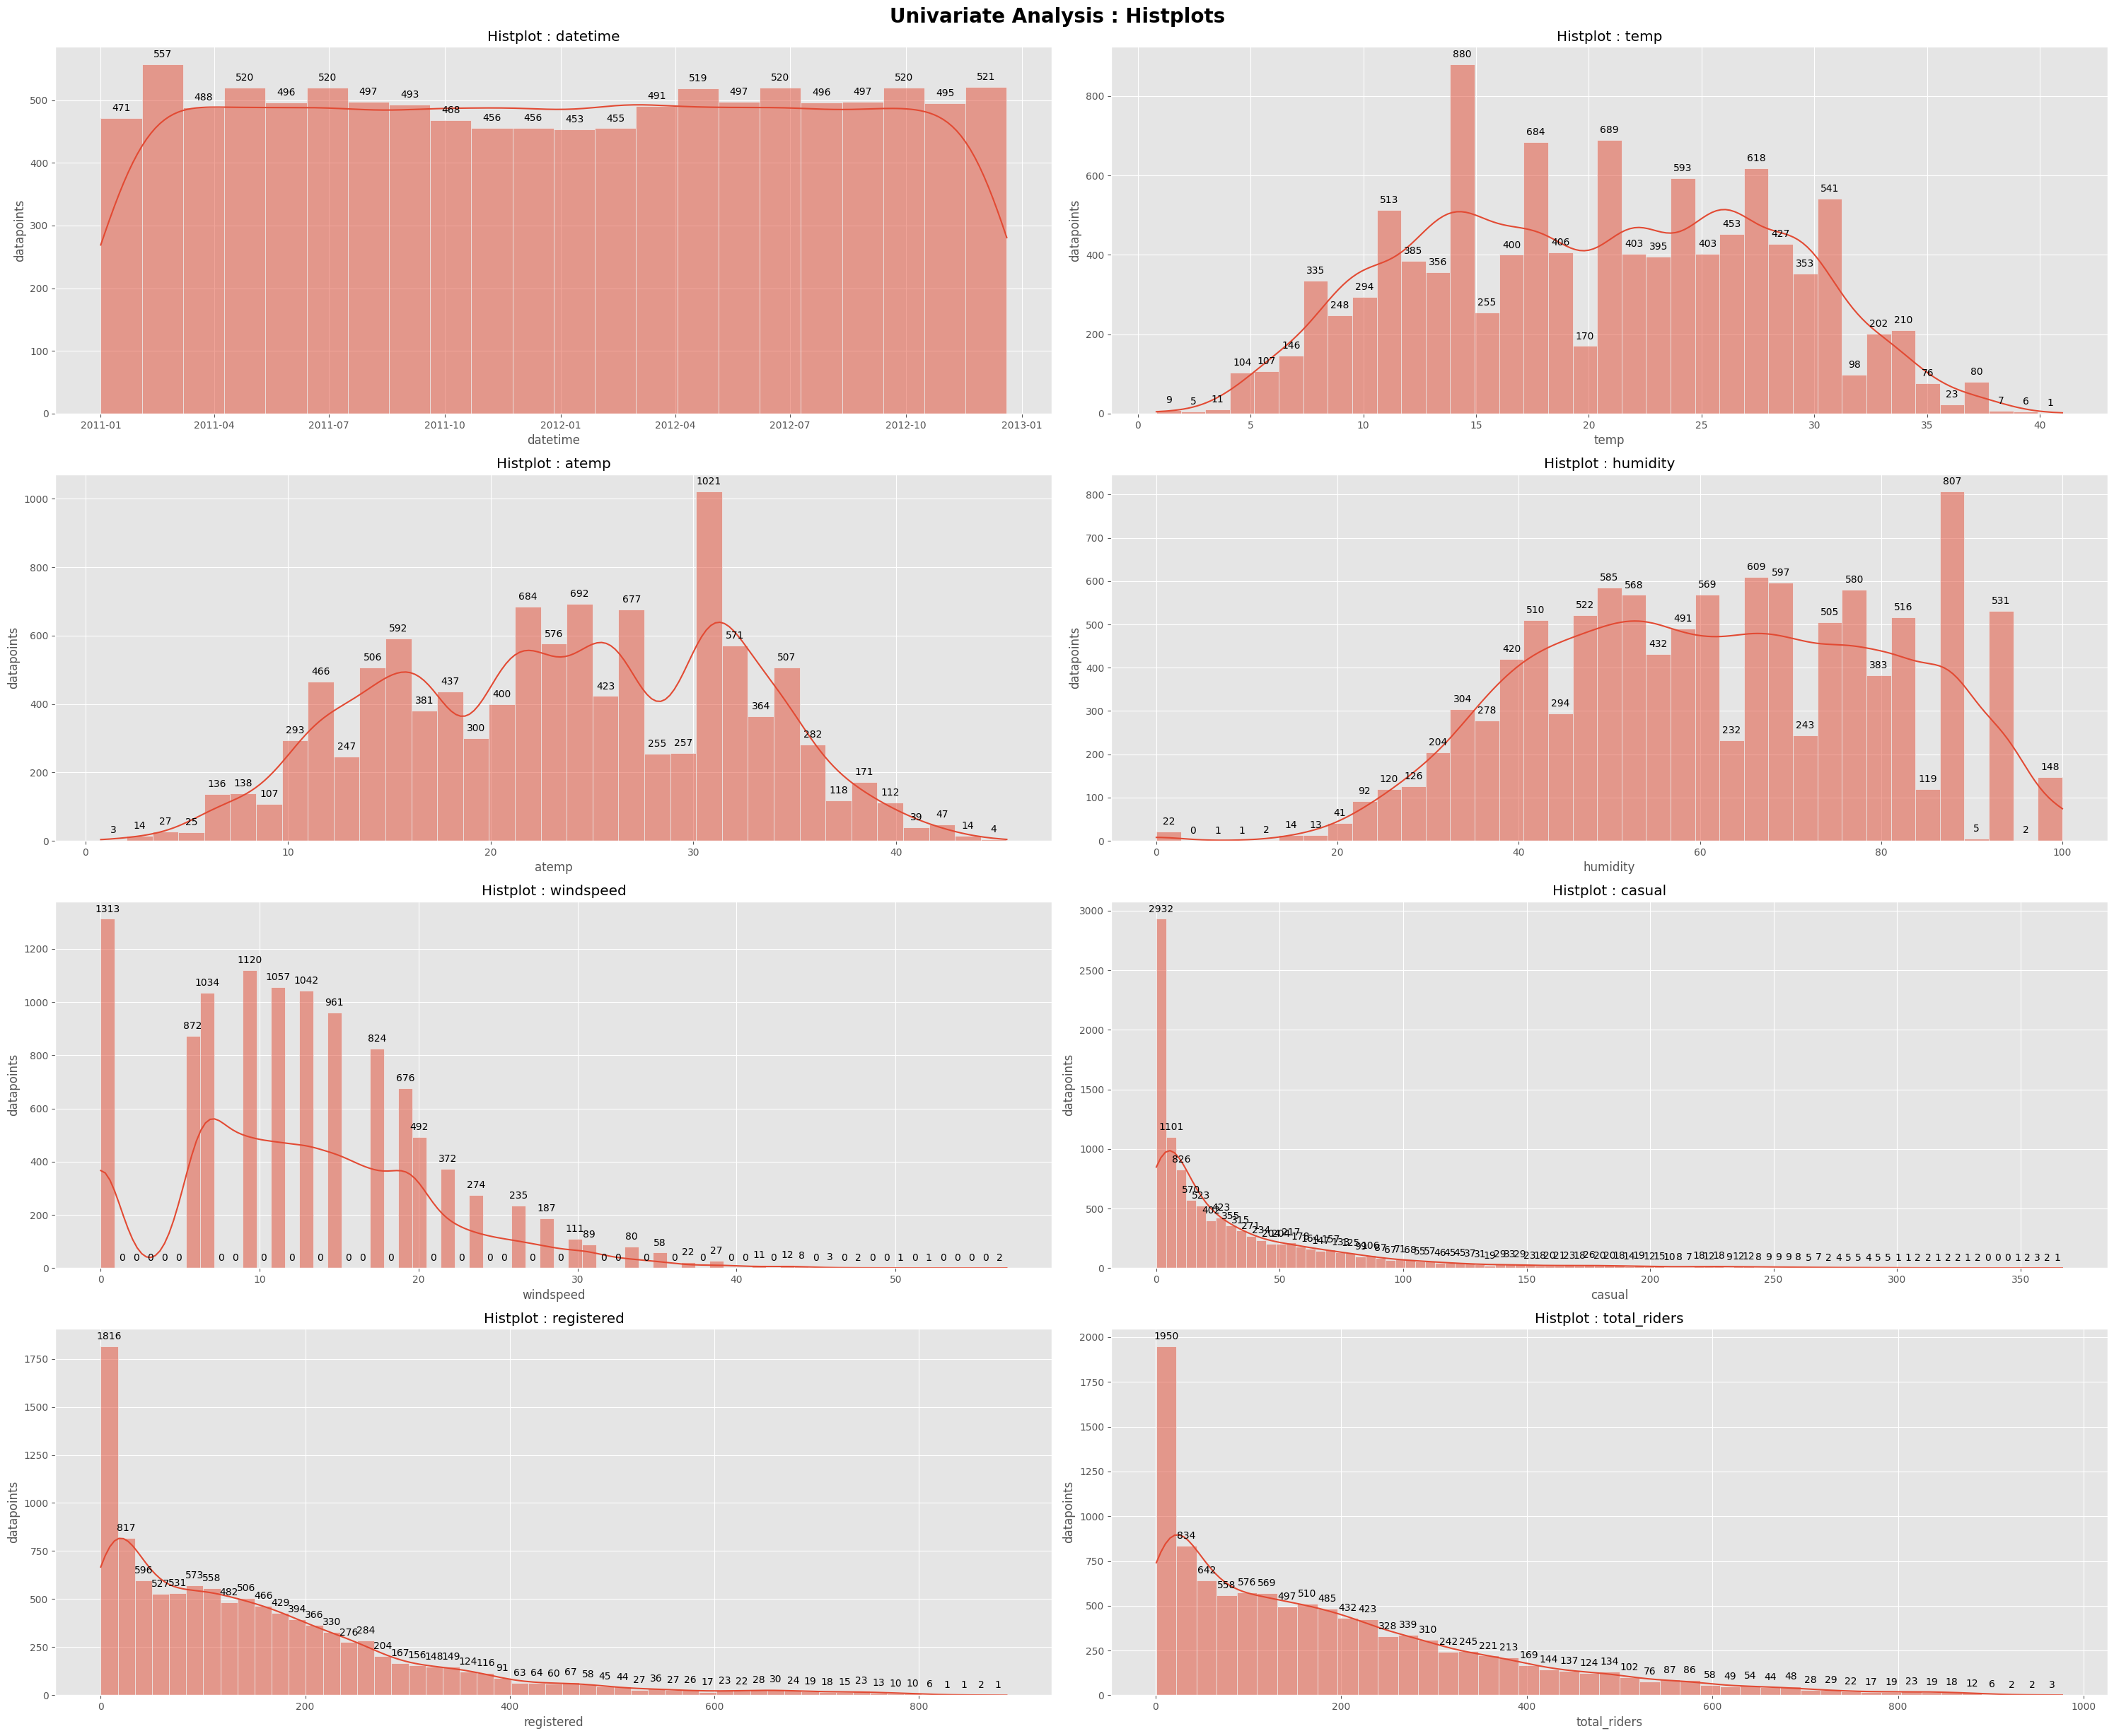

In [24]:
with plt.style.context("ggplot"):
  # Create a figure with a custom grid
  fig = plt.figure(figsize=(30, 25))
  gs = GridSpec(4, 6, figure=fig)

  # Create subplots
  ax1 = fig.add_subplot(gs[0, :3])
  ax2 = fig.add_subplot(gs[0, 3:])
  ax3 = fig.add_subplot(gs[1, :3])
  ax4 = fig.add_subplot(gs[1, 3:])
  ax5 = fig.add_subplot(gs[2, :3])
  ax6 = fig.add_subplot(gs[2, 3:])
  ax7 = fig.add_subplot(gs[3, :3])
  ax8 = fig.add_subplot(gs[3, 3:])

  spaces = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

  for col, space in zip(num_cols, spaces):
    sns.histplot(data = df, x = col, kde = True, ax = space)
    space.set_ylabel("datapoints")
    space.set_title(f"Histplot : {col}")
    # Adding annotations
    for p in space.patches:
      height = p.get_height()  # Get the height of the bar
      space.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='center', xytext=(0, 10), textcoords='offset points', weight='book')

  plt.suptitle("Univariate Analysis : Histplots", weight = 'bold', size = 20)
  plt.tight_layout(rect=[0, 0, 1, 0.99])
  plt.show()

**Observations :**

- Important thing to note here is that <mark>the above scatterplots do not indicate the actual counts of the riders, rather they show the count of datapoints against the rest of the features.</mark>
- Hence, no significant insights can be drawn from these plots apart from the one that, <mark>there was a slight dip in the number of datapoints approximately between September'11 & March'12. This does not necessarily mean that there was a dip in the number of riders during the period.</mark>

  <mark>Instead, the dip could be because there might have been no usage of bikes during some hours in that period at all.</mark>

<div style="page-break-after: always;"></div>

**Boxplots for Numeric features**

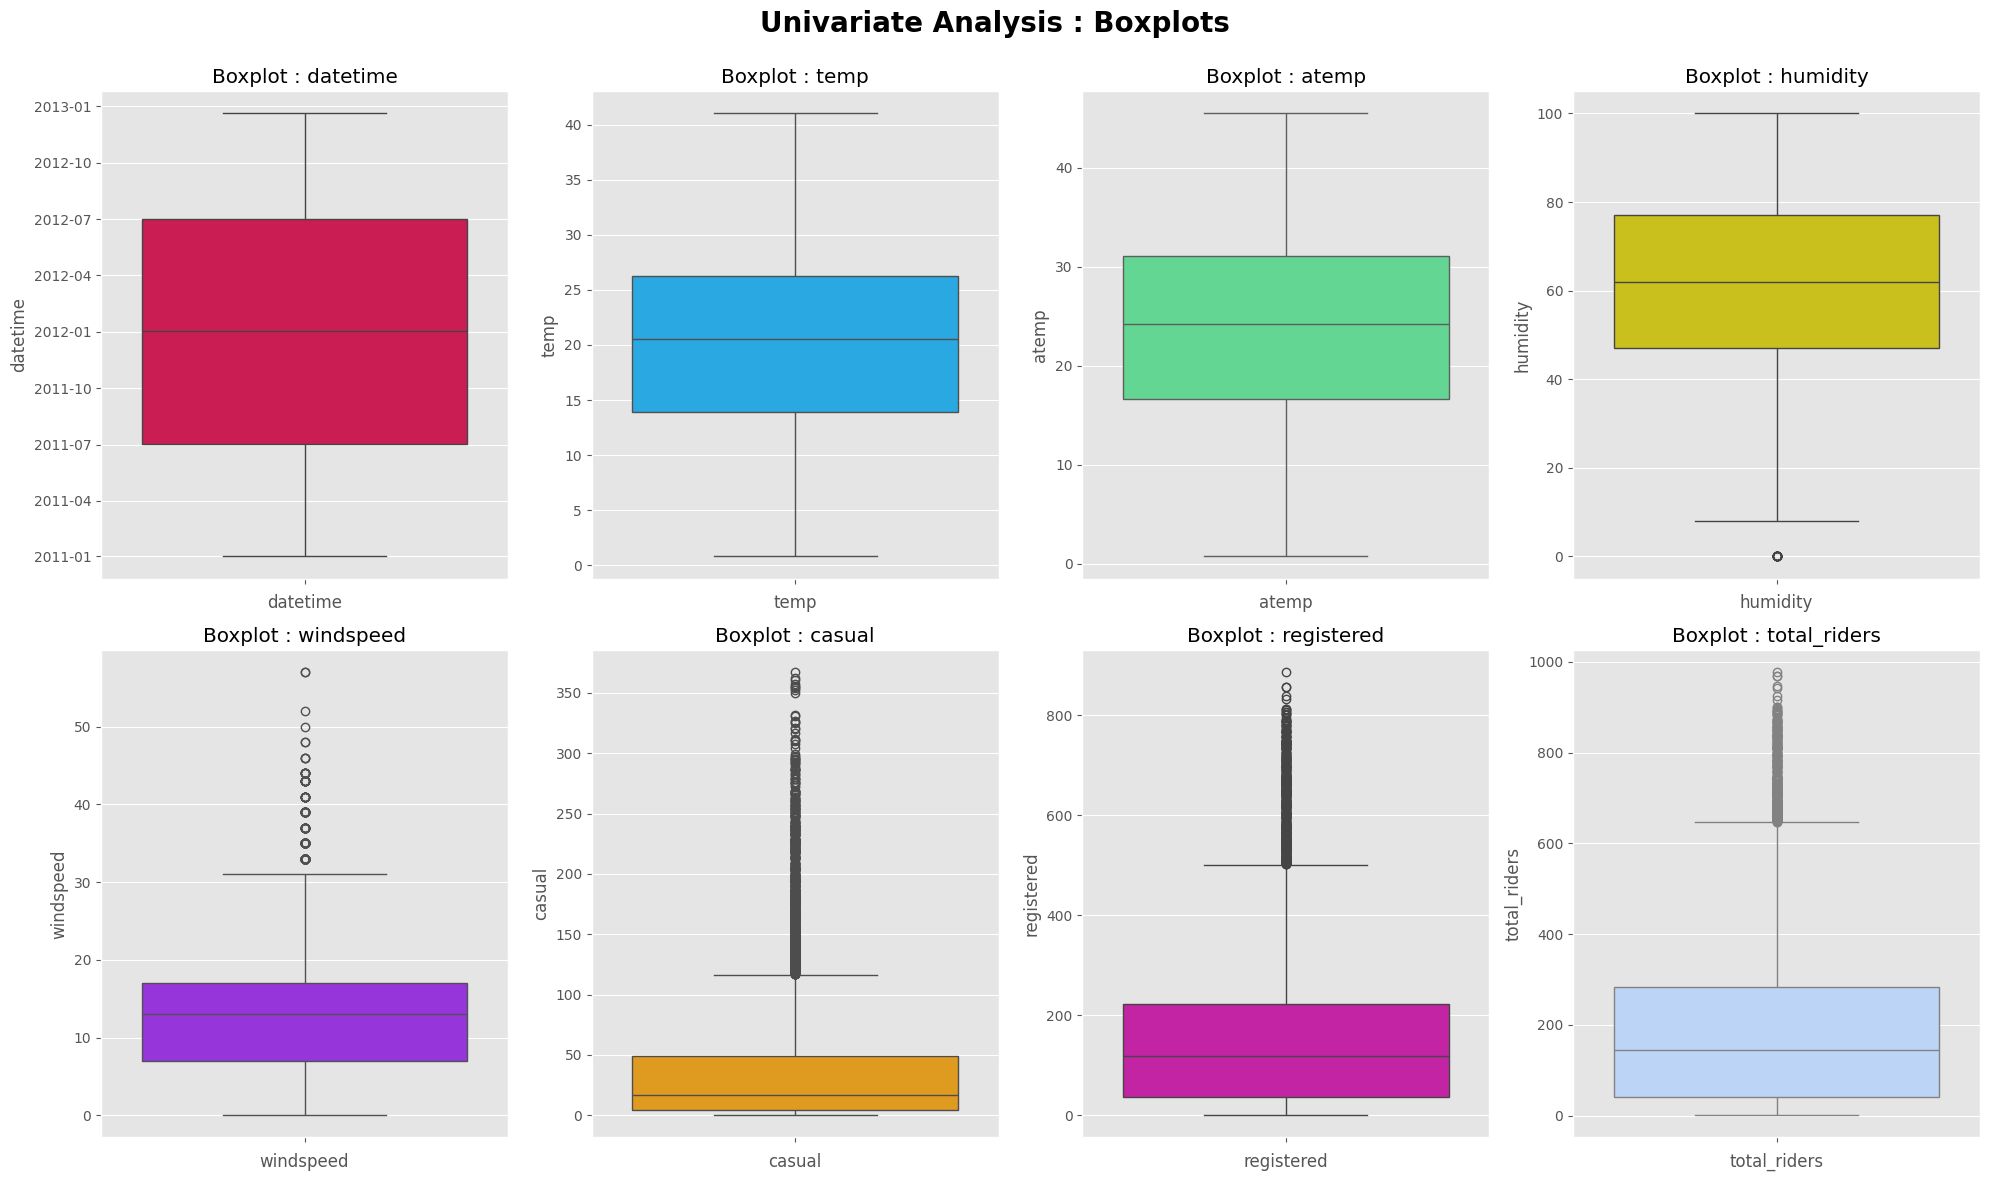

In [25]:
with plt.style.context("ggplot"):
  # Create a figure with a custom grid
  fig = plt.figure(figsize=(20,12))
  gs = GridSpec(4, 8, figure=fig)

  # Create subplots
  ax1 = fig.add_subplot(gs[0:2, :2])
  ax2 = fig.add_subplot(gs[0:2, 2:4])
  ax3 = fig.add_subplot(gs[0:2, 4:6])
  ax4 = fig.add_subplot(gs[0:2, 6:])
  ax5 = fig.add_subplot(gs[2:, :2])
  ax6 = fig.add_subplot(gs[2:, 2:4])
  ax7 = fig.add_subplot(gs[2:, 4:6])
  ax8 = fig.add_subplot(gs[2:, 6:])

  spaces = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

  for col, space, colour in zip(num_cols, spaces, colplts[2]):
    sns.boxplot(data = df, y = col, ax = space, color = colour)
    space.set_title(f"Boxplot : {col}")
    space.set_xlabel(col)

  plt.suptitle("Univariate Analysis : Boxplots", weight = 'bold', size = 20)

  plt.tight_layout(rect=[0, 0, 1, 0.98])
  plt.show()

**Observations :**

- The 'windspeed', 'casual', 'registered', 'count' columns have significant number of outliers.
- The 'humidity' column has some outliers too.


In [26]:
num_cols.remove('datetime')

<div style="page-break-after: always;"></div>

**Categorical Random Variables**

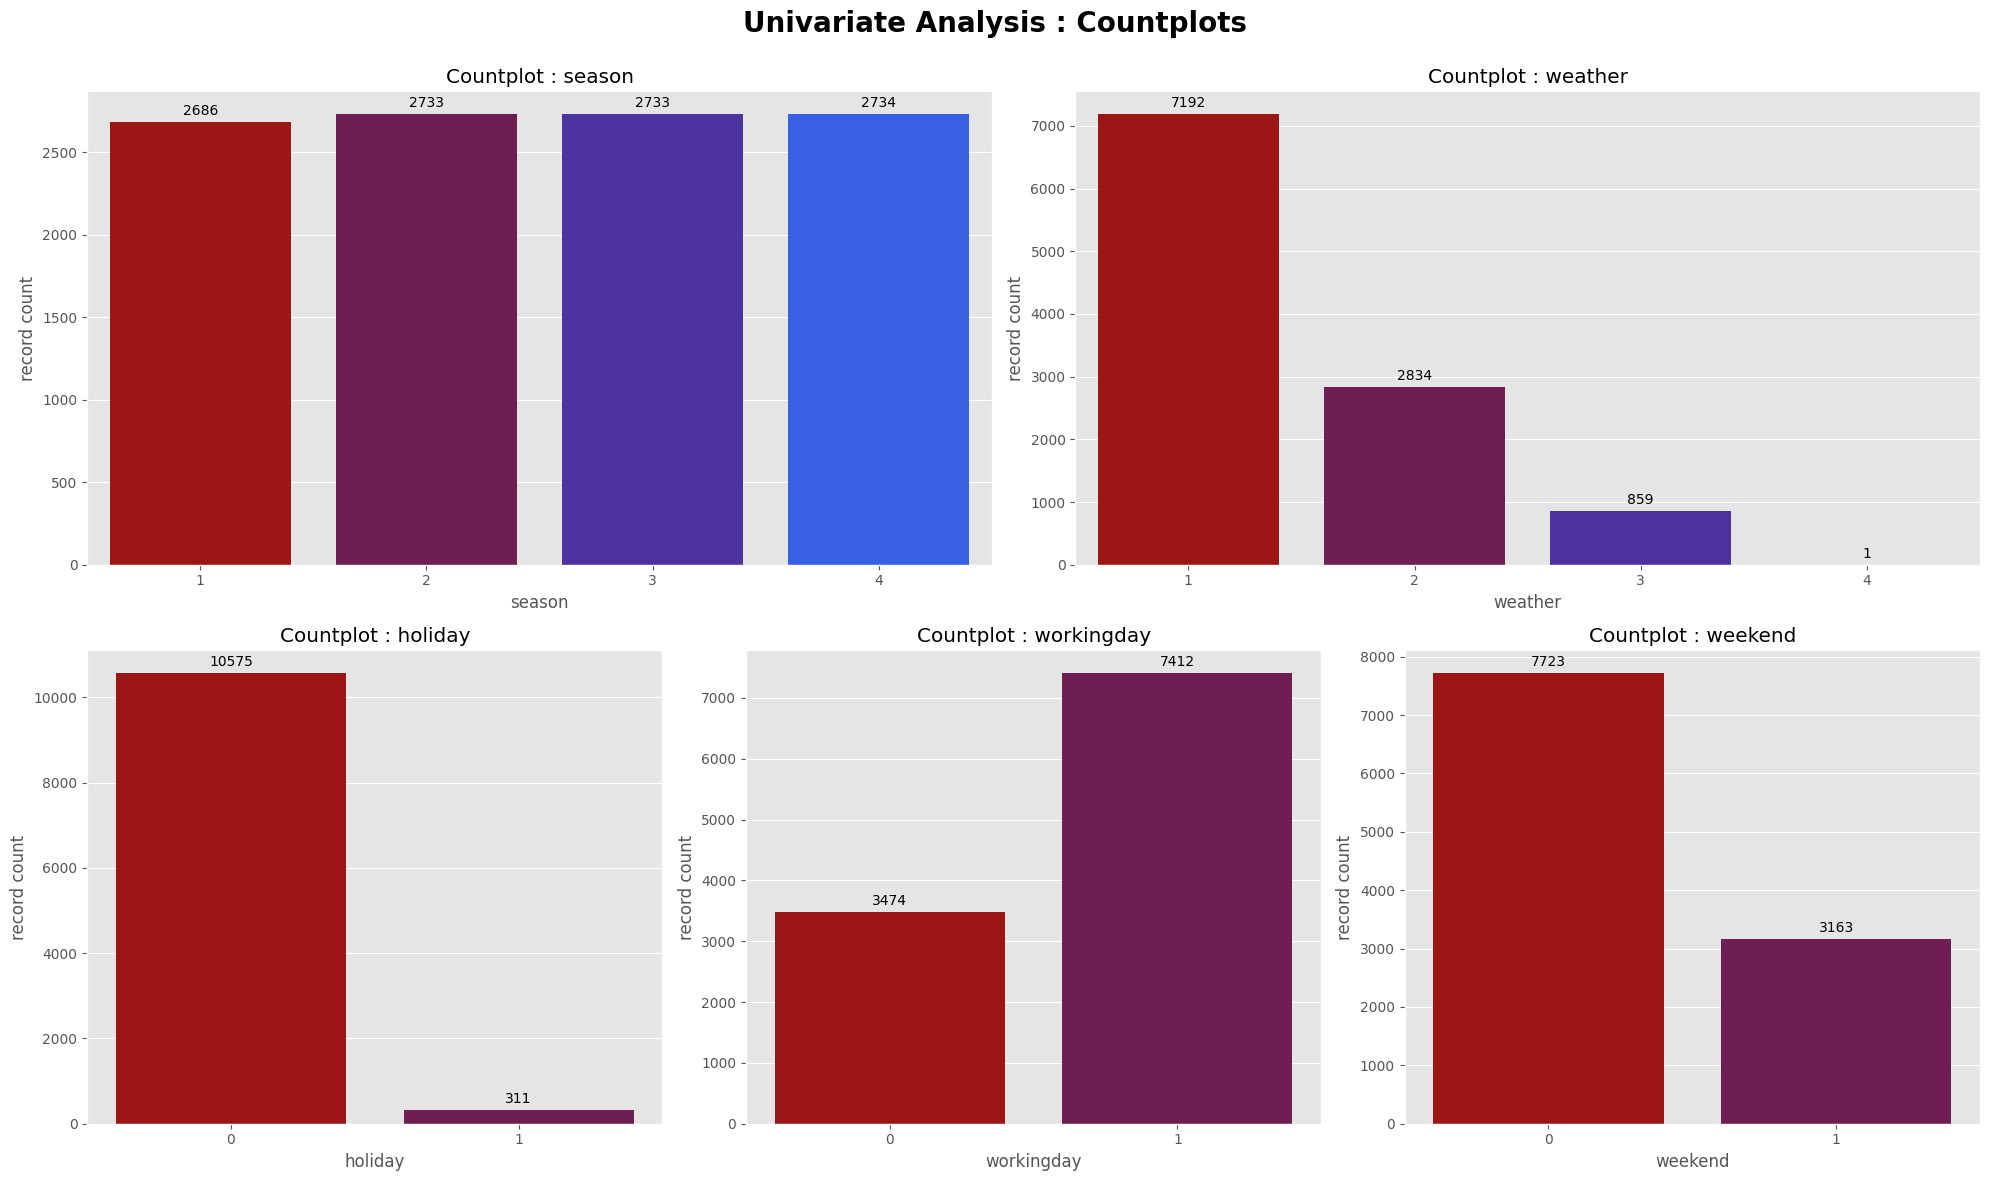

In [27]:
# Reordering cat_cols for convenience
cat_cols = ['season', 'weather', 'holiday', 'workingday', 'weekend']


with plt.style.context('ggplot'):
  # Create a figure with a custom grid
  fig = plt.figure(figsize=(20, 12))
  gs = GridSpec(2, 6, figure=fig)

  # Create subplots
  ax1 = fig.add_subplot(gs[0, :3])
  ax2 = fig.add_subplot(gs[0, 3:])
  ax3 = fig.add_subplot(gs[1, :2])
  ax4 = fig.add_subplot(gs[1, 2:4])
  ax5 = fig.add_subplot(gs[1, 4:])

  spaces = [ax1, ax2, ax3, ax4, ax5]

  for col, space in zip(cat_cols, spaces):
    sns.countplot(x=df[col], ax = space, palette = colplts[3])
    space.set_title(f"Countplot : {col}")
    space.set_ylabel("record count")

    # Adding annotations
    for p in space.patches:
      height = p.get_height()  # Get the height of the bar
      space.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='center', xytext=(0, 8), textcoords='offset points', weight='book')

  plt.suptitle("Univariate Analysis : Countplots", weight = 'bold', size = 20)
  plt.tight_layout(rect=[0, 0, 1, 0.98])
  plt.show()

The barplots here do not indicate the actual counts of the riders, rather they show the count of datapoints against the rest of the features.

The 'weather' column has a single datapoint for the value 4, which is not that relevant for our analysis. So let's drop it.

In [28]:
df.drop(df[df['weather']==4].index, inplace = True)
# For categorical columns, the df retains the category even if all the rows pertaining to the category are dropped.
# Hence, we have to explicitly remove the unused categories.
df['weather'] = df['weather'].cat.remove_unused_categories()
df.weather.nunique()

3

<div style="page-break-after: always;"></div>

#### **Bivariate Analysis**

In [29]:
print(f"Numericals : {num_cols}\nCategoricals : {cat_cols}")

Numericals : ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'total_riders']
Categoricals : ['season', 'weather', 'holiday', 'workingday', 'weekend']


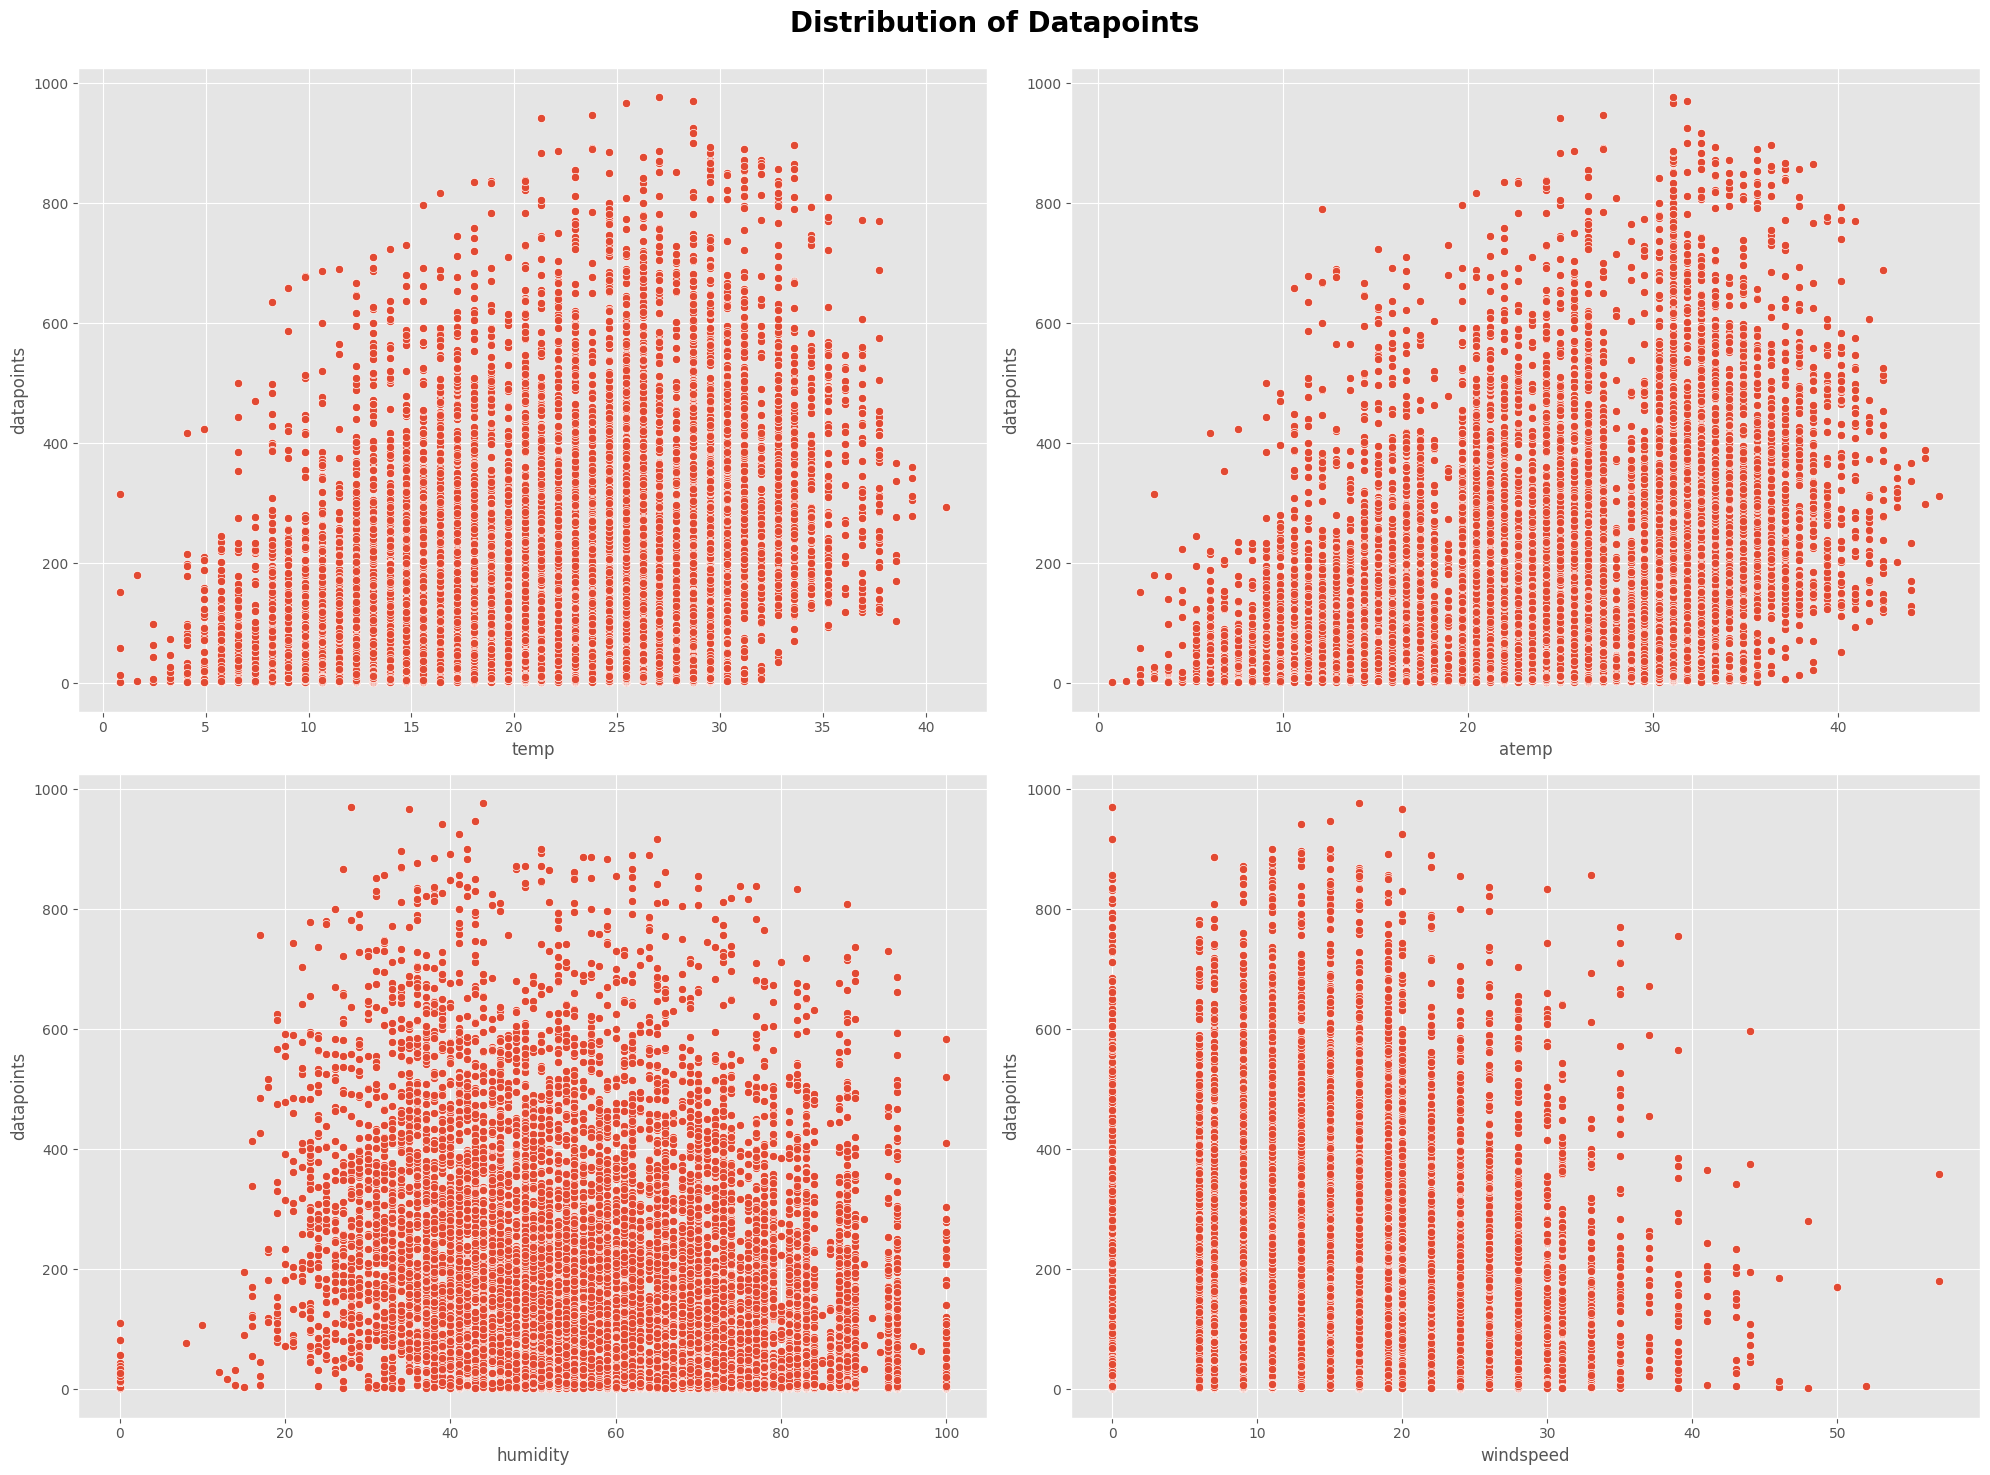

In [30]:
# Reordering cat_cols for convenience
num_cols_bi = ['temp', 'atemp', 'humidity', 'windspeed']

with plt.style.context("ggplot"):
  # Create a figure with a custom grid
  fig = plt.figure(figsize=(20, 15))
  gs = GridSpec(2, 2, figure=fig)

  # Create subplots
  ax1 = fig.add_subplot(gs[0, :1])
  ax2 = fig.add_subplot(gs[0, 1:])
  ax3 = fig.add_subplot(gs[1, :1])
  ax4 = fig.add_subplot(gs[1, 1:])

  spaces = [ax1, ax2, ax3, ax4]

  for col, space in zip(num_cols_bi, spaces):
    sns.scatterplot(data = df, x = col, y = tgt_var, palette = colplts[2], ax = space)
    space.set_ylabel("datapoints")

  plt.suptitle("Distribution of Datapoints", weight = 'bold', size = 20)
  plt.tight_layout(rect=[0, 0, 1, 0.98])
  plt.show()

<div style="page-break-after: always;"></div>

##### **Categorical Random Variables**

The values for the 'workingday', 'holiday' & 'weekend' columns are all binary.

Instead of having 3 different columns for 'workingday', 'holiday' & 'weekend'..  we can create a single column 'daytype' that will report the kind of day it is.


In [31]:
# Create daytype column using numpy.select
conditions = [
    df['holiday'] == 1,
    df['workingday'] == 1,
    df['weekend'] == 1
]
choices = ['H', 'W', 'S']

df['daytype'] = np.select(conditions, choices, default='U')
df[df['daytype']=='U']

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_riders,weekend,daytype


The absence of the default value 'U' in the dataset tells us that the mapping of the columns is complete and to the mark.

In [32]:
# Print the new column to verify
df[['holiday', 'weekend', 'workingday', 'daytype']].sample(5)

,holiday,weekend,workingday,daytype
5413,0,0,1,W
4148,0,0,1,W
361,0,1,0,S
2344,0,1,0,S
10119,0,0,1,W


In [33]:
# Creating a function to plot Categorical features against the number of users

def bi_cat_plots(data):
  # Ensure 'season' is treated as a categorical variable
  data[data.columns[0]] = data[data.columns[0]].astype('category')
  with plt.style.context('ggplot'):
    plt.figure(figsize = (20,8))
    ax = sns.barplot(data = data, x = data.columns[0], y = tgt_var, palette = 'twilight')
    sns.lineplot(data = data['casual'], color = 'y', marker = 'o')
    sns.lineplot(data = data['registered'], color = 'g', marker = 'o')

    for p in ax.patches:
      height = p.get_height()  # Get the height of the bar
      ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='center', xytext=(0, 8), textcoords='offset points', weight='book')

    # Creating custom legend elements
    legend_elements = [
        Line2D([0], [0], color='y', label='Casual users'),
        Line2D([0], [0], color='g', label='Registered users'),
    ]

    plt.legend(handles=legend_elements, loc='best', title = 'Legend', fontsize=13, title_fontsize=13)

    plt.suptitle(f"Barplot : Total customers | {data.columns[0]}", weight = 'bold', size = 16)
    plt.tight_layout()
    plt.show()

<div style="page-break-after: always;"></div>

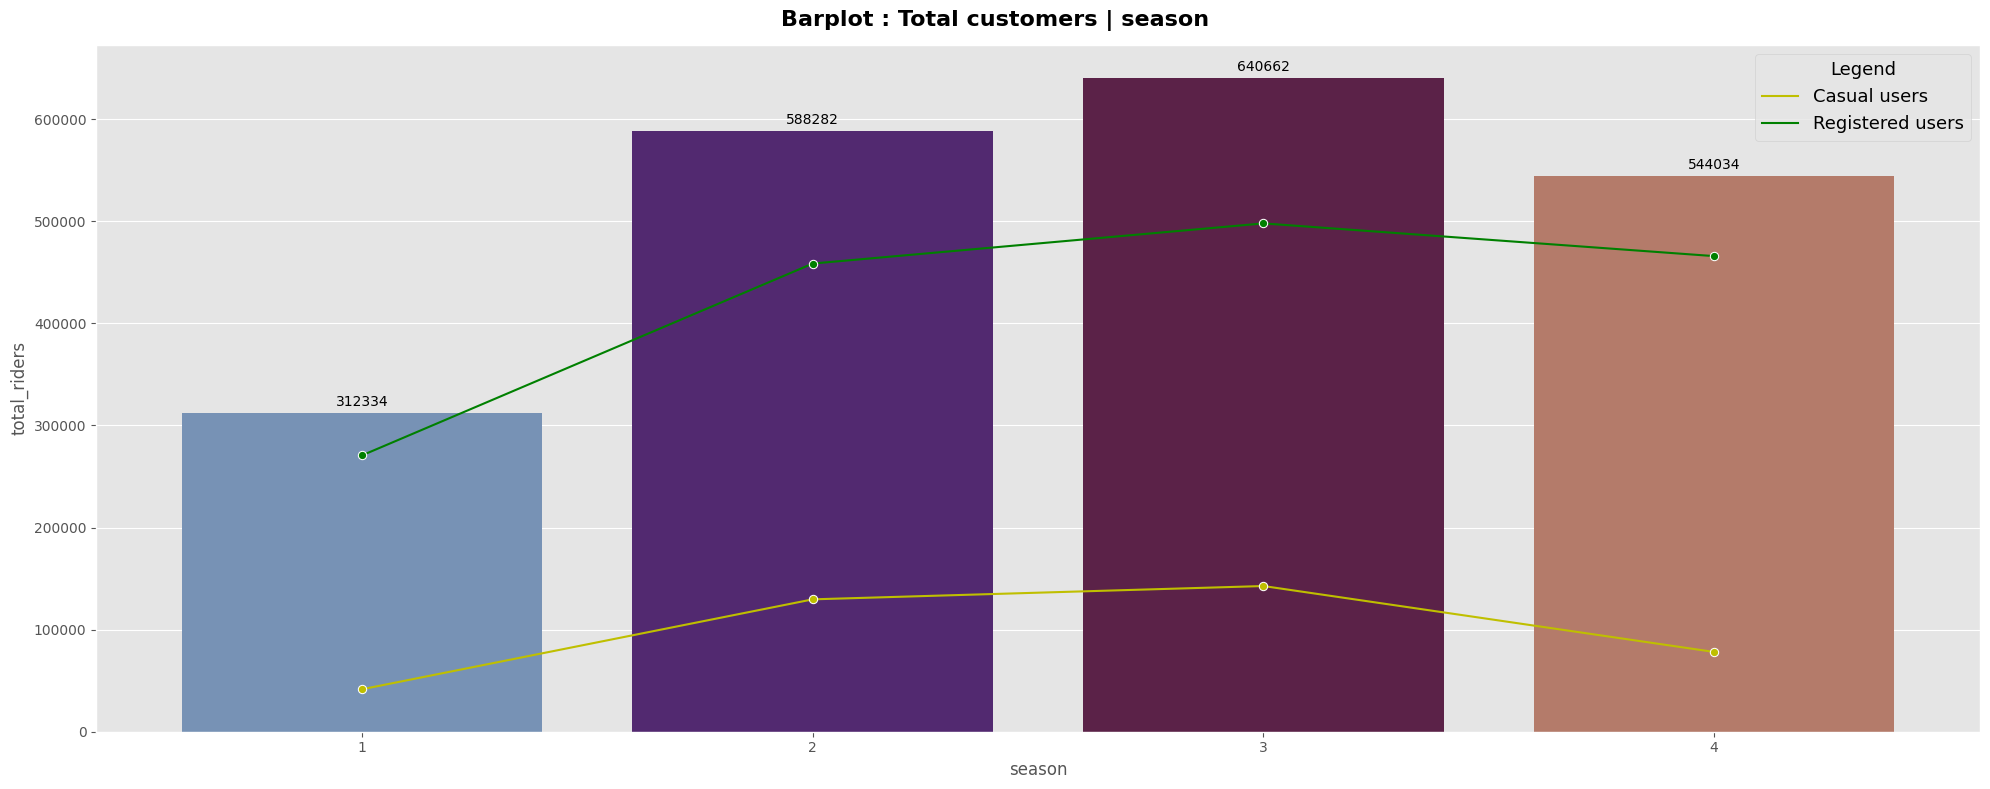

In [34]:
# Seasons vs the number of users
# In order to relate the number of users with the seasons, we need to group the data by seasons.
dt_seasons = df.groupby(by = ['season']).agg({'total_riders':'sum', 'casual':'sum', 'registered':'sum'}).reset_index()
bi_cat_plots(dt_seasons)

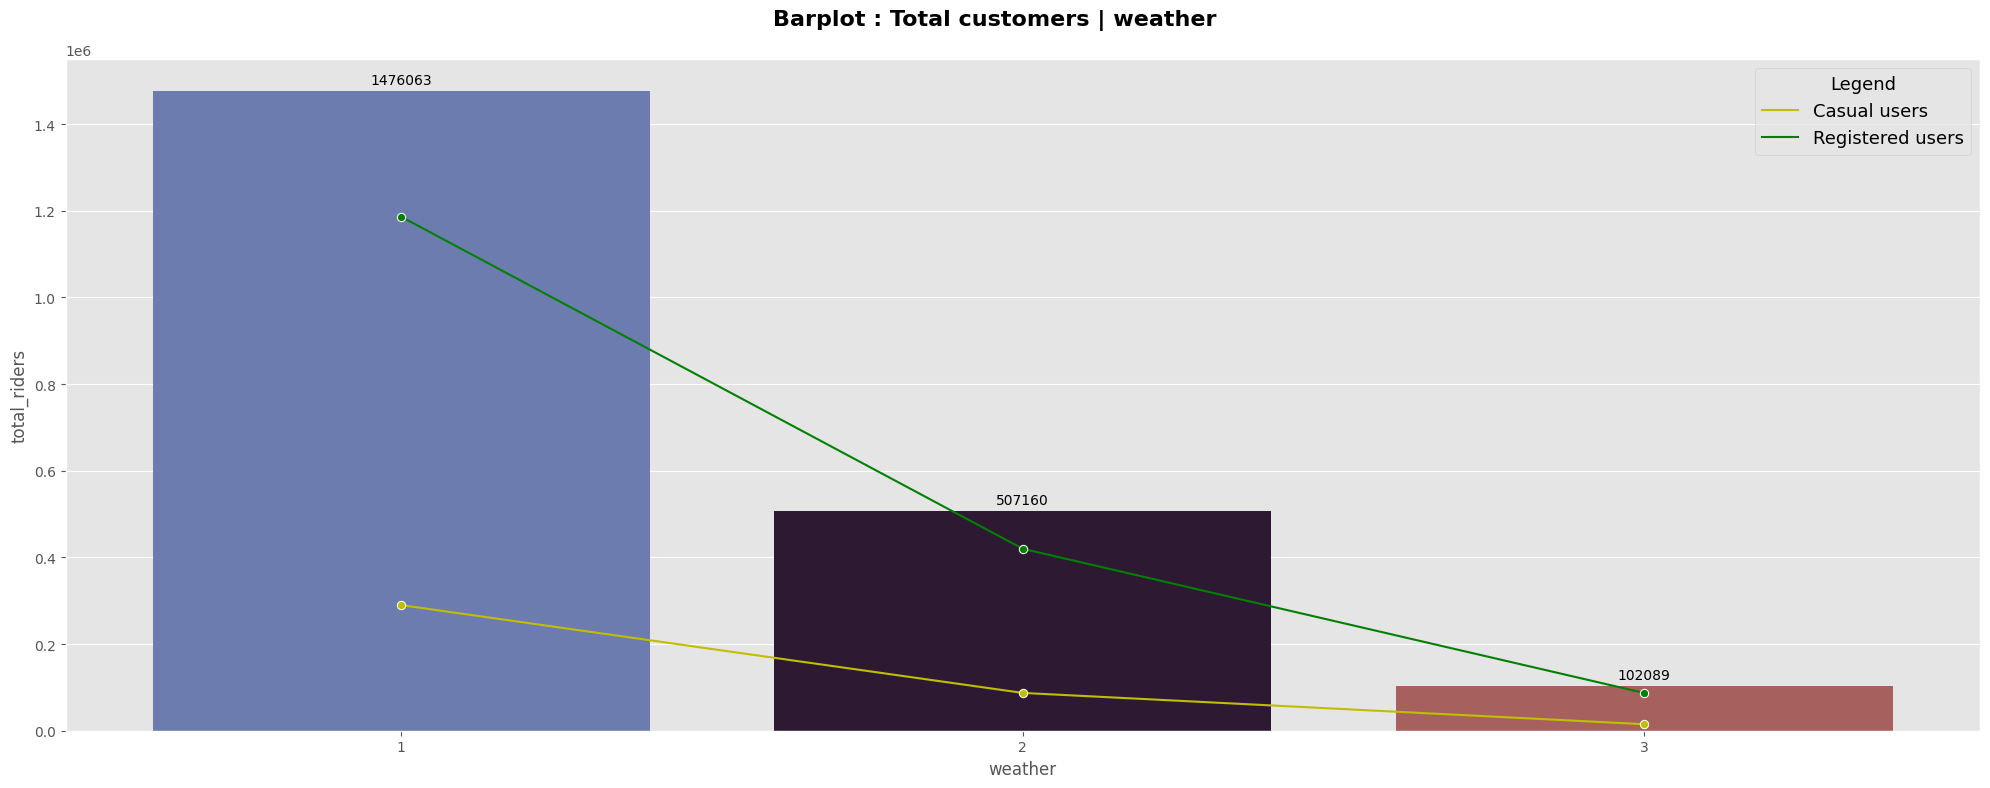

In [35]:
# Weather vs the number of users
# In order to relate the number of users with the Weather, we need to group the data by weathers.
dt_weather = df.groupby(by = ['weather']).agg({'total_riders':'sum', 'casual':'sum', 'registered':'sum'}).reset_index()
bi_cat_plots(dt_weather)

<div style="page-break-after: always;"></div>

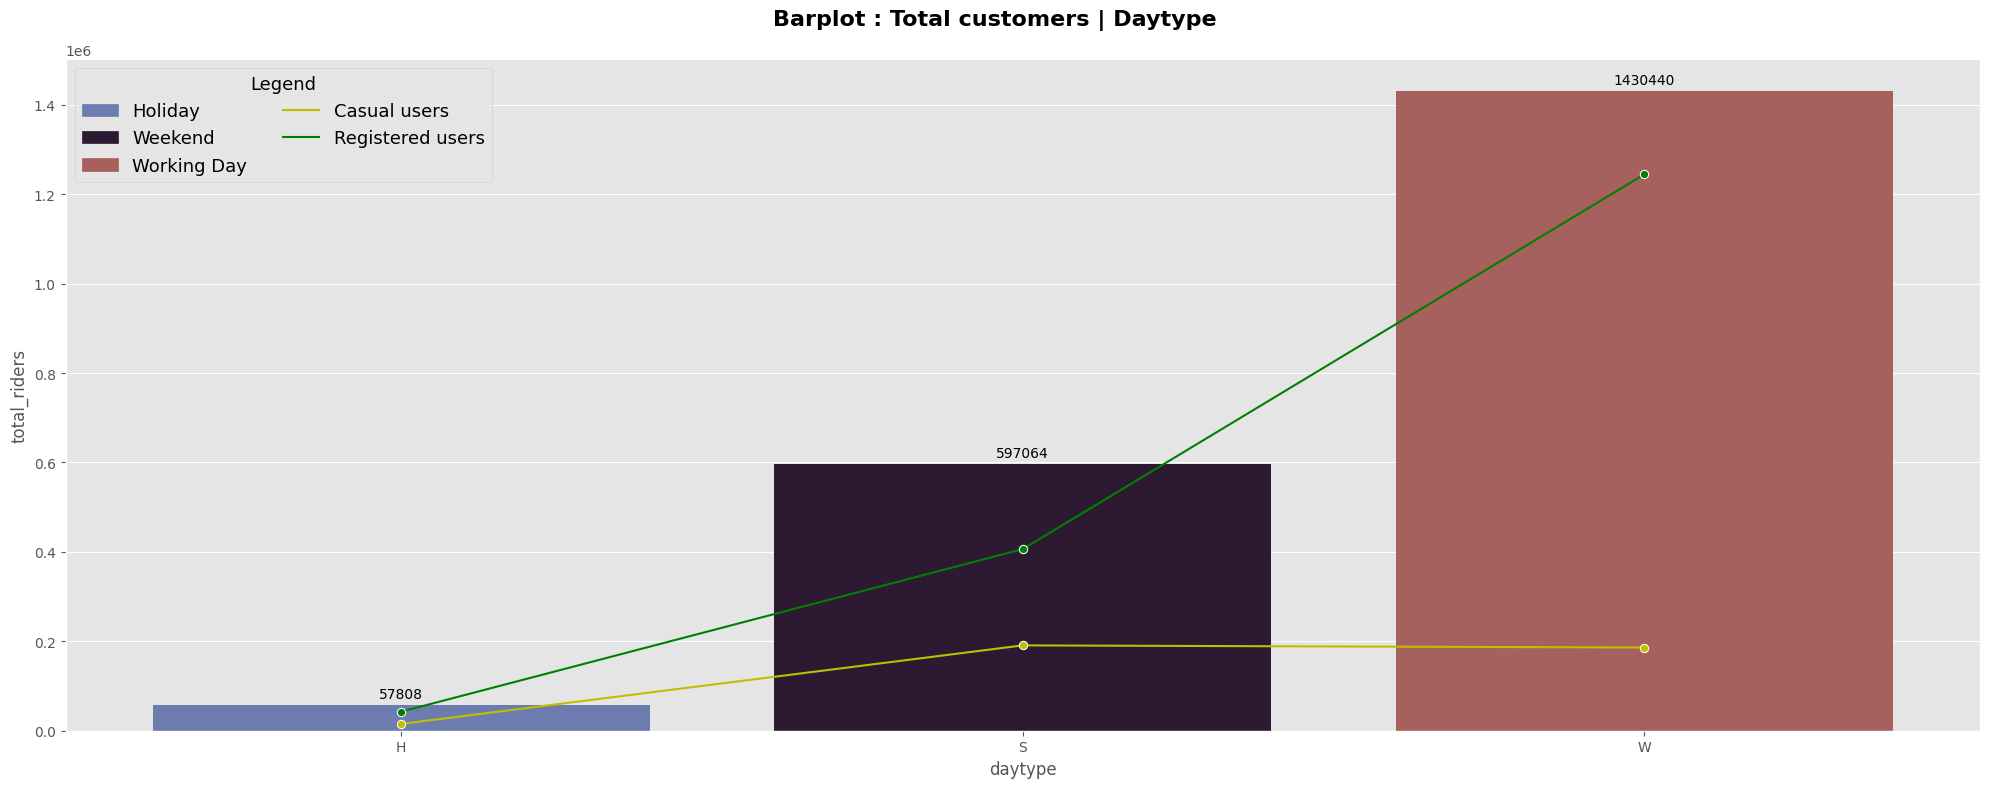

In [36]:
# Daytype vs the number of users
# In order to relate the number of users with the daytype, we need to group the data by daytype.
dt_daytype = df.groupby(by = ['daytype']).agg({'total_riders':'sum', 'casual':'sum', 'registered':'sum'}).reset_index()

with plt.style.context('ggplot'):
  plt.figure(figsize = (20,8))
  ax = sns.barplot(data = dt_daytype, x = 'daytype', y = tgt_var, palette = 'twilight')
  sns.lineplot(data = dt_daytype['casual'], color = 'y', marker = 'o')
  sns.lineplot(data = dt_daytype['registered'], color = 'g', marker = 'o')

  # Annotating heights over each bar of the plot
  for p in ax.patches:
    height = p.get_height()  # Get the height of the bar
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='center', xytext=(0, 8), textcoords='offset points', weight='book')

    # Extract colors used in the bar plot
    bar_colors = [bar.get_facecolor() for bar in ax.patches]

    # Creating custom legend elements
    legend_elements = [
        Patch(color=bar_colors[0], label='Holiday'),
        Patch(color=bar_colors[1], label='Weekend'),
        Patch(color=bar_colors[2], label='Working Day'),
        Line2D([0], [0], color='y', label='Casual users'),
        Line2D([0], [0], color='g', label='Registered users')
    ]

  plt.legend(handles=legend_elements, loc='upper left', title = 'Legend', fontsize=13, title_fontsize=13, ncol = 2)
  plt.suptitle('Barplot : Total customers | Daytype', weight = 'bold', size = 16)
  plt.tight_layout()
  plt.show()

**Observations:**

- Season 3, i.e. Fall, shows the highest number of riders, both Casual as well as Registered.
- Season 1, i.e. Spring, shows the least number of riders, both Casual as well as Registered.
- <mark>The significant drop in casual ridership during winter and spring suggests that weather conditions strongly influence casual user behavior, with less favorable seasons seeing reduced participation from non-regular users.</mark>
- <mark>Weather condition 1(Clear/Few clouds/partly cloudy) shows the highest number of riders both casual and registered, since the clear skies favour the rides.</mark>
- Weather condition 4(Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog) doesn't really go along with riding bikes outdoors, which is why the count of riders is the least for the weather condition 4.
- <mark>Working days have the highest number of riders with a significant majority of registered users indicating a strong reliance of users upon the service.</mark>
- Weekends have more or less equal casual riders when compared to workdays, indicating casual riders use the service more on weekends.
- Holidays have the least number of riders altogether.

<div style="page-break-after: always;"></div>

##### **Numerical Random Variables**

In [37]:
def bi_num_plots(data):
  with plt.style.context('ggplot'):
    plt.figure(figsize = (20,8))
    ax = sns.barplot(data = data, x = data.columns[0], y = tgt_var, palette = colplts[4])
    sns.lineplot(data = data['casual'], color = 'm', marker = 'o')
    sns.lineplot(data = data['registered'], color = 'g', marker = 'o')

    # Annotating heights over each bar of the plot
    for p in ax.patches:
      height = p.get_height()  # Get the height of the bar
      ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='center', xytext=(0, 30),rotation = 90, textcoords='offset points', weight='book')


    # Creating custom legend elements
    legend_elements = [
        Line2D([0], [0], color='b', label='Casual users'),
        Line2D([0], [0], color='g', label='Registered users'),
    ]

    # Adding the custom legend created earlier
    plt.legend(handles=legend_elements, loc='best', title = 'Legend', fontsize=13, title_fontsize=13)

    plt.xticks(rotation = 45)
    plt.suptitle(f"Barplot : Total customers | {data.columns[0]}", weight = 'bold', size = 16)
    plt.tight_layout()
    plt.show()

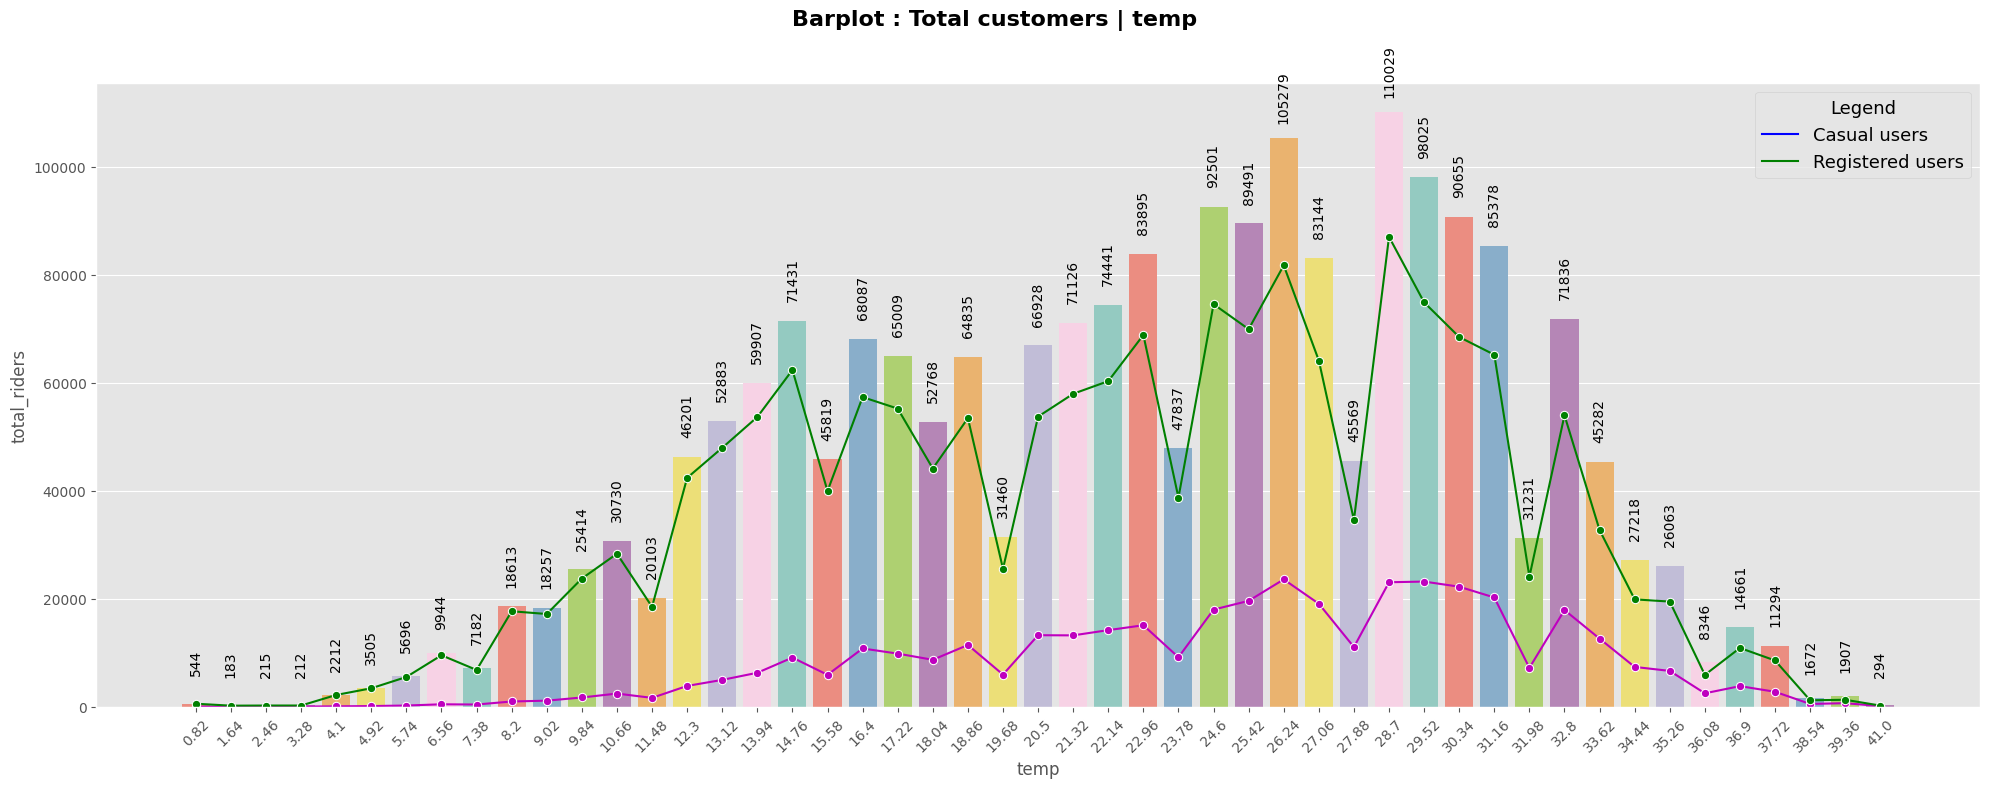

In [38]:
dt_temp = df.groupby(by = ['temp']).agg({'total_riders':'sum', 'casual':'sum', 'registered':'sum'}).reset_index()
bi_num_plots(dt_temp)

<div style="page-break-after: always;"></div>

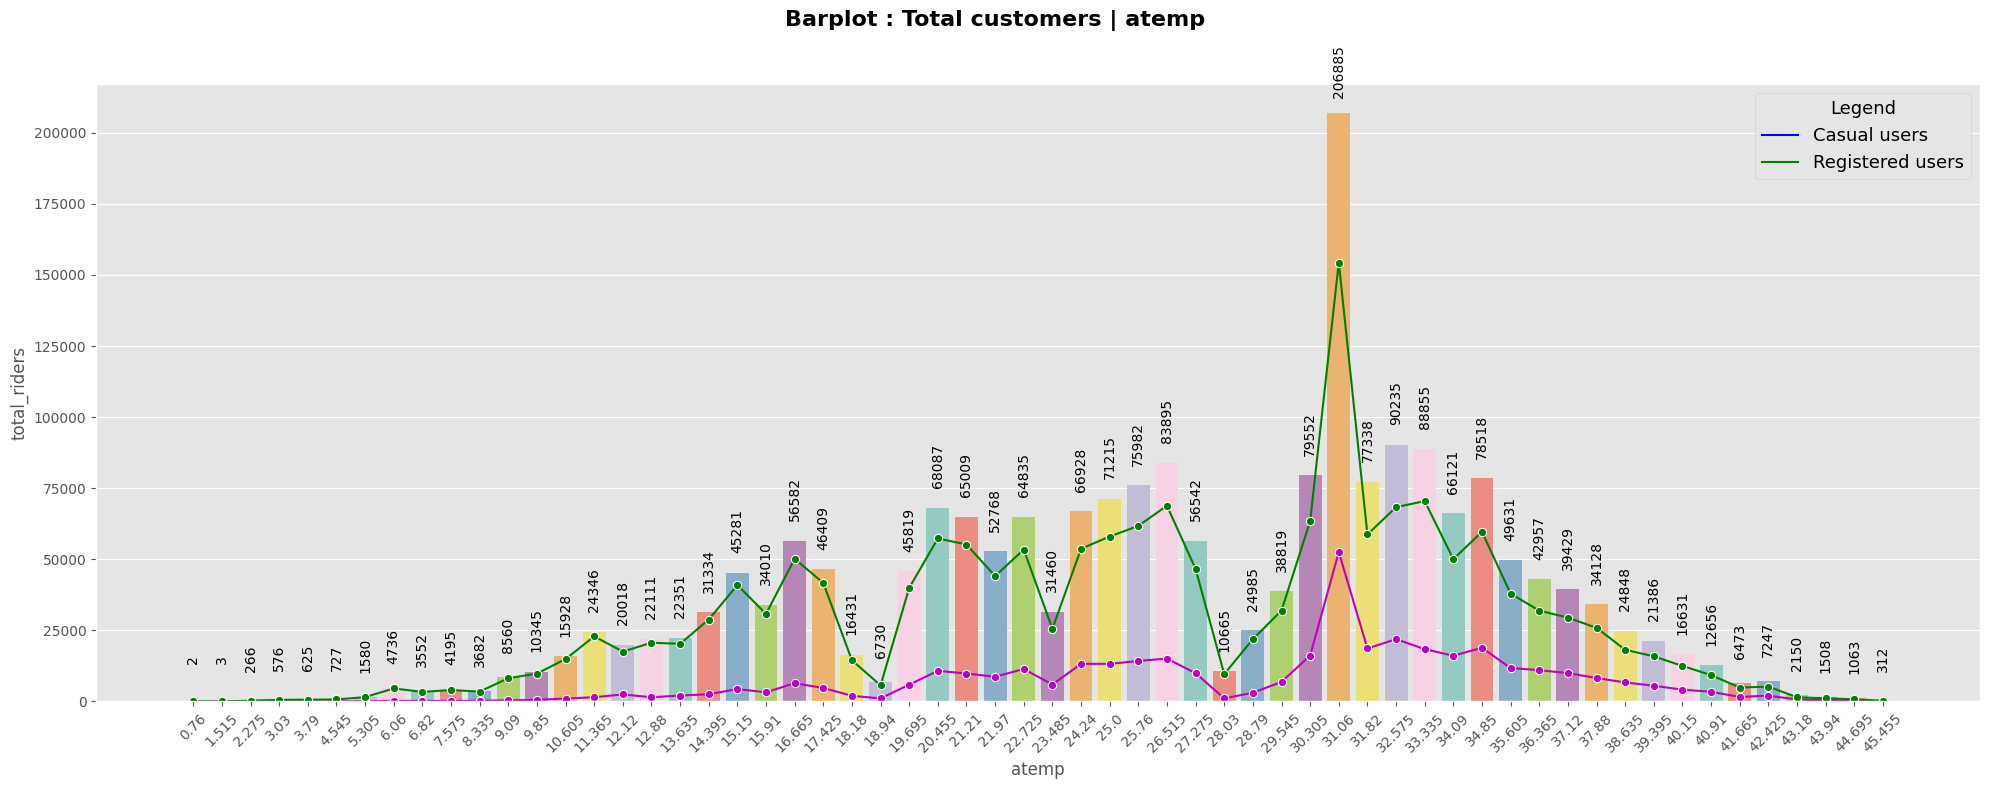

In [39]:
dt_atemp = df.groupby(by = ['atemp']).agg({'total_riders':'sum', 'casual':'sum', 'registered':'sum'}).reset_index()
bi_num_plots(dt_atemp)

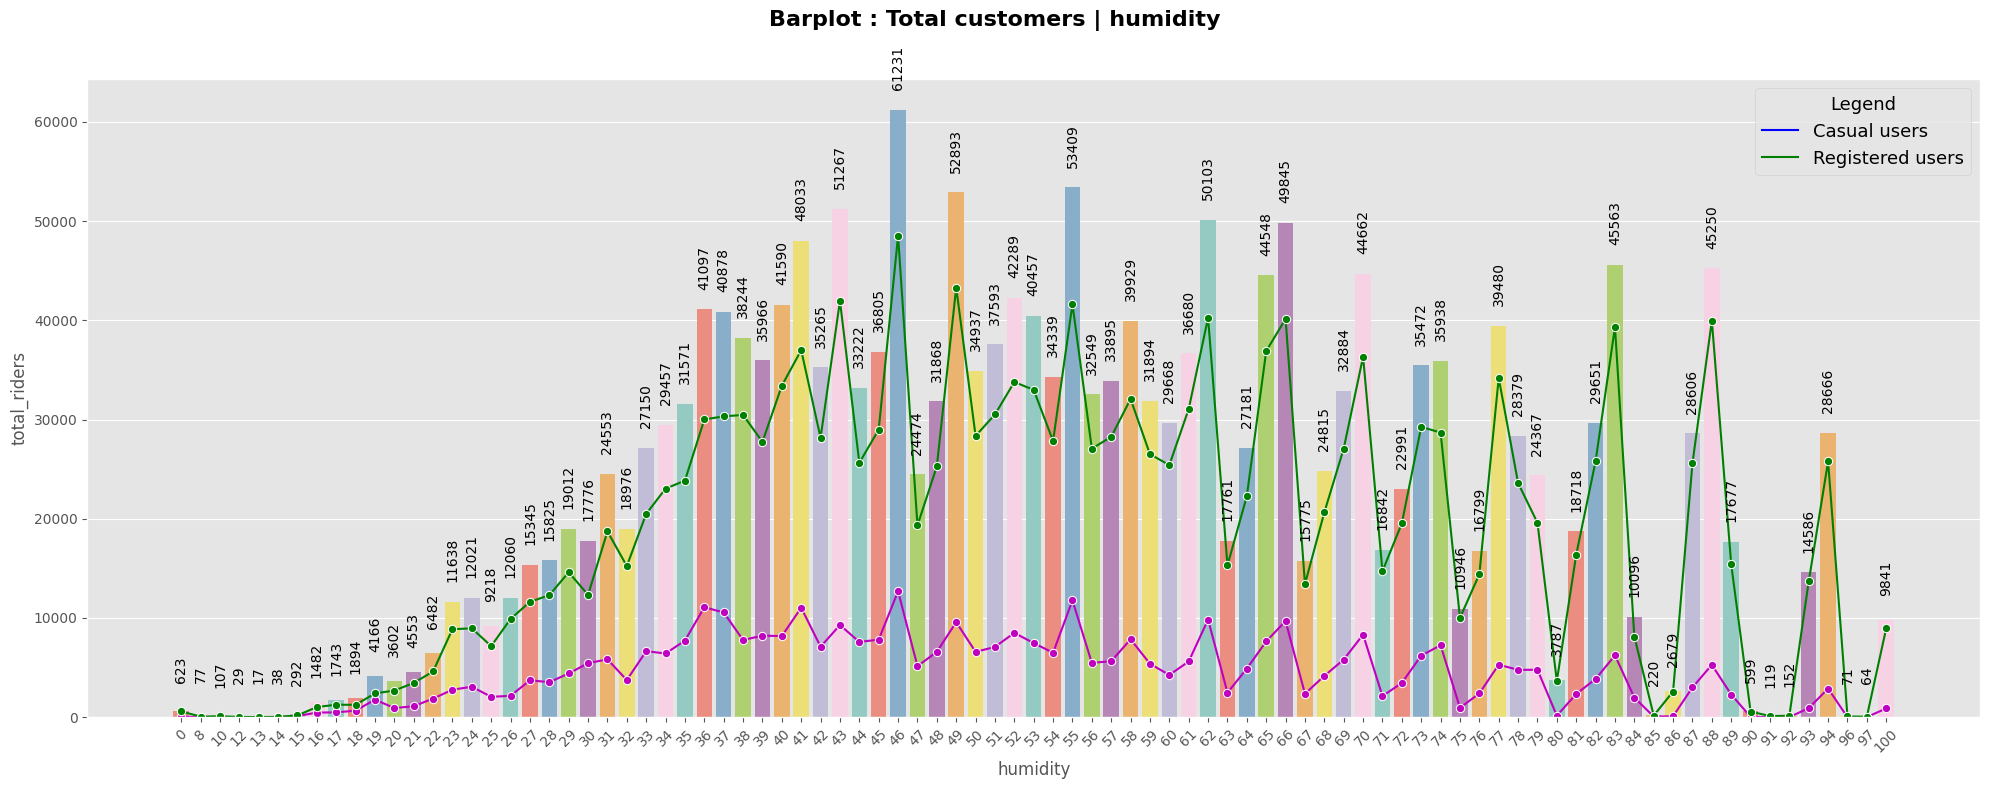

In [40]:
dt_hum = df.groupby(by = ['humidity']).agg({'total_riders':'sum', 'casual':'sum', 'registered':'sum'}).reset_index()
bi_num_plots(dt_hum)

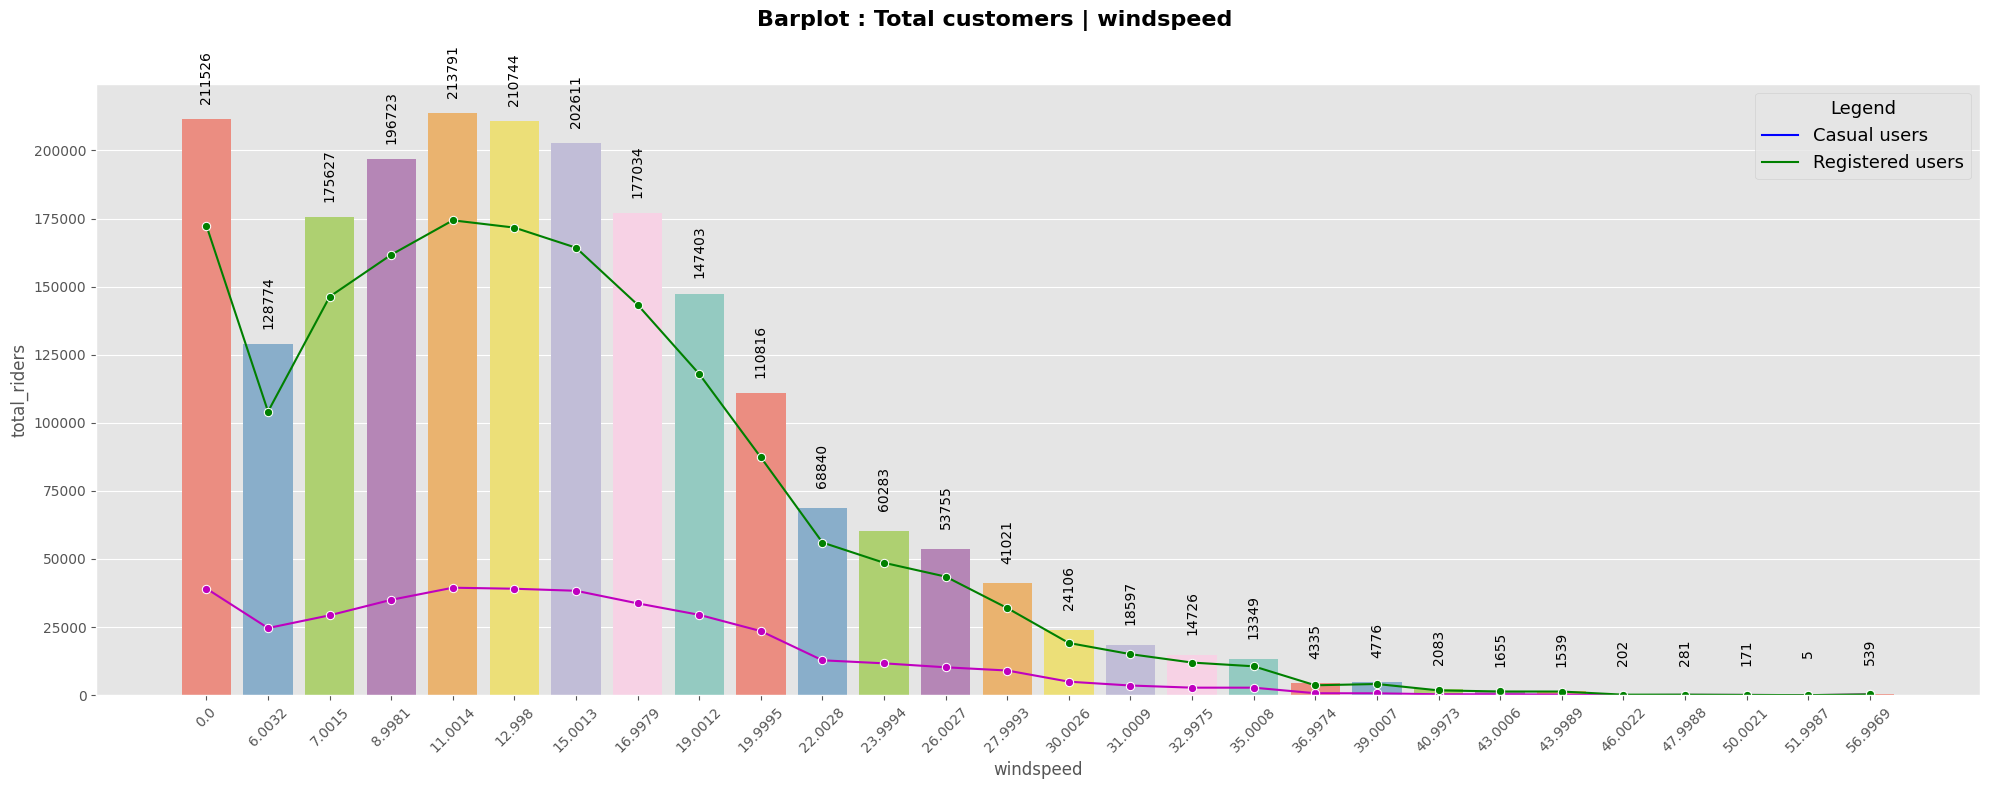

In [41]:
dt_wind = df.groupby(by = ['windspeed']).agg({'total_riders':'sum', 'casual':'sum', 'registered':'sum'}).reset_index()
bi_num_plots(dt_wind)

<div style="page-break-after: always;"></div>

**Observations:**

- Peak customer numbers occur at temperatures between 20-25°C.
- <mark>Extreme temperatures (both cold and hot) correspond to significantly fewer customers.</mark>

- Customer numbers show a clear peak at around 25-30°C apparent temperatures.
- There's a dramatic drop in customers at both very low (<10°C) and very high (>35°C) apparent temperatures.

- <mark>Customer numbers peak at moderate humidity levels (around 50-70%).</mark>
- Both very low (<20%) and very high (>90%) humidity levels correspond to lower customer counts.
- There's a gradual increase in customers as humidity rises from low to moderate levels.

- <mark>Customer counts are highest at low to moderate wind speeds (0-15 mph).</mark>
- <mark>There's a sharp decline in customers as wind speed increases beyond 15 mph.</mark>
- Very high wind speeds (>30 mph) see extremely low customer numbers.

<div style="page-break-after: always;"></div>

### **Correlations & Pairplots**


In [42]:
(cr_mtx := df[num_cols].corr().round(3))

,temp,atemp,humidity,windspeed,casual,registered,total_riders
temp,1.000,0.985,-0.065,-0.018,0.467,0.319,0.394
atemp,0.985,1.000,-0.043,-0.058,0.462,0.315,0.390
humidity,-0.065,-0.043,1.000,-0.319,-0.348,-0.265,-0.317
windspeed,-0.018,-0.058,-0.319,1.000,0.092,0.091,0.101
casual,0.467,0.462,-0.348,0.092,1.000,0.497,0.690
registered,0.319,0.315,-0.265,0.091,0.497,1.000,0.971
total_riders,0.394,0.390,-0.317,0.101,0.690,0.971,1.000


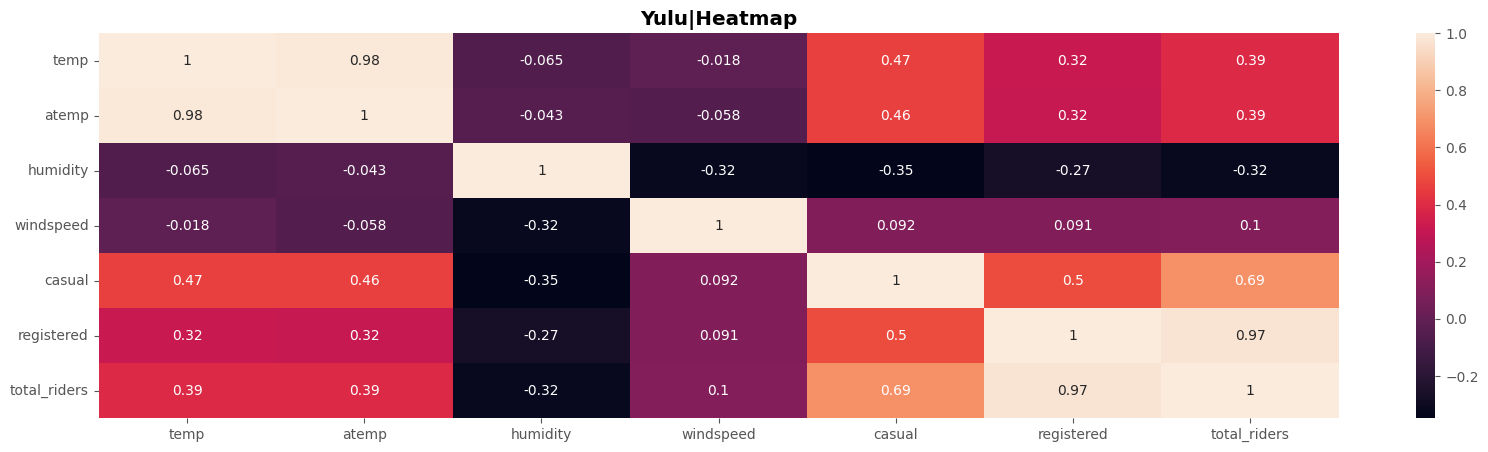

In [43]:
with plt.style.context('ggplot'):
  plt.figure(figsize = (20,5))
  sns.heatmap(data = cr_mtx, annot=True)
  plt.title('Yulu|Heatmap', weight = 'bold')
  plt.show()

**Observations :**

- Temperature and apparent temperature are nearly identical (0.985 correlation).
- Casual riders are more weather-sensitive than registered users.
- Humidity negatively impacts ridership, especially for casual users.
- Wind speed has minimal effect on ridership decisions.
- Total ridership is primarily driven by registered users (0.971 correlation).
- Temperature has the strongest positive impact on ridership among weather variables.
- Casual and registered rider behaviors show moderate correlation (0.497).
- Humidity tends to be lower on warmer, windier days.
- Registered users show more consistent riding patterns across weather conditions.
- Wind speed is largely independent of temperature.
- Weather factors affect casual riders more strongly than registered riders.
- Humidity is the most significant negative weather factor for ridership.

<div style="page-break-after: always;"></div>

## **Hypothesis Testing**

### **Working Day | Mean hourly count of electric cycles rented**

In [44]:
# Creating two different samples for working and non working days from the dataset.
workingday = df[df['workingday']==1][tgt_var]
nonworkingday = df[df['workingday']==0][tgt_var]

**Formulation of the Null & Alternate Hypothesis**


The Null & Alternate hypothesis for our experiment can be framed as below.

In [45]:
Ho = "Working days have no significant impact on the average hourly number of bike riders."
Ha = "Working days have a significant impact on the average hourly number of bike riders."

**Test Selection**

- Given the Categorical-Numerical nature of the analysis of our random variables, where the categorical random variable has <=2 categories, it is fit for us to perform a `Two sampled t-test` here.

In [46]:
df.groupby('workingday')[tgt_var].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7411.0,193.015787,184.525801,1.0,41.0,151.0,277.0,977.0


From the data description above, it is clear that the number of datapoints for 'workingday' and 'nonworkingday' are unequal.

Hence, in order to ensure no bias in the test, we have to take equal samples.

In [47]:
workingday = workingday.sample(len(nonworkingday))

**Significance Level**

- Considering our test, we can set significance level to be 5%.

In [48]:
alpha = 0.05

**Calculating the test Statistics / p-value**

In [49]:
test_stat, p_val = ttest_ind(workingday, nonworkingday, equal_var = False, alternative = 'greater')
print(f"Test statistic : {round(test_stat, 5)}\np-value : {round(p_val, 5)}")

Test statistic : 2.04492
p-value : 0.02045


**Test Result**

In [50]:
print(f"Reject Ho, \"{Ha}\"") if p_val <= alpha else f"Fail to reject Ho, \"{Ho}\""

Reject Ho, "Working days have a significant impact on the average hourly number of bike riders."


**Result : _Working days do not impact the mean hourly number of riders using the mobility service._**

<div style="page-break-after: always;"></div>

### **Weather Conditions | Mean hourly count of electric cycles rented**

In [51]:
# Creating samples for the different weather groups from the dataset
weather_1 = df[df['weather']==1][tgt_var]
weather_2 = df[df['weather']==2][tgt_var]
weather_3 = df[df['weather']==3][tgt_var]

**Formulation of the Null & Alternate Hypothesis**


The Null & Alternate hypothesis for our experiment can be framed as below.

In [52]:
Ho = "There is no significant difference in the means of hourly rider counts for all the weather groups."
Ha = "The mean hourly count of riders is significantly different for at least one of the weather groups."

**Test Selection**
- Given the categorical-numerical nature of the analysis of our Random variables with more than 2 unique categories, we can use the `one-way ANOVA test` to test our established hypotheses.

In [53]:
df.groupby('weather')[tgt_var].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0


From the above statistical description of the 'count' column grouped by 'weather', it is eminent that the sample sizes for all our 3 categories are different and hence we need to create samples of equal sizes.

In [54]:
weather_1 = weather_1.sample(len(weather_3))
weather_2 = weather_2.sample(len(weather_3))

**Significance Level**

- Considering our test, we can set significance level to be 5%.

In [55]:
alpha = 0.05

**Test Assumptions**

**_Test for Normality_**

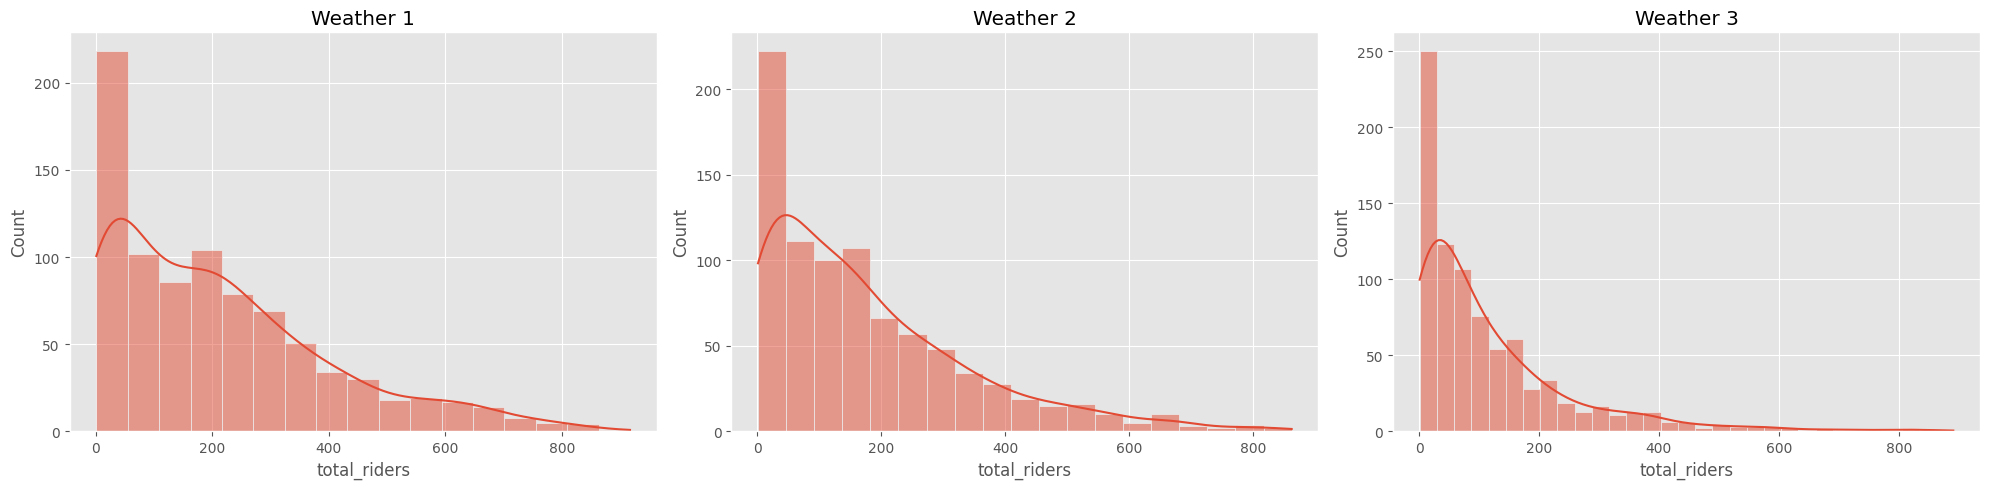

In [56]:
# Let's begin by plotting histplots of the weather samples.
with plt.style.context('ggplot'):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

  sns.histplot(data=weather_1, ax=ax1, kde = True)
  ax1.set_title('Weather 1')

  sns.histplot(data=weather_2, ax=ax2, kde = True)
  ax2.set_title('Weather 2')

  sns.histplot(data=weather_3, ax=ax3, kde = True)
  ax3.set_title('Weather 3')
  plt.tight_layout()
  plt.show()

From the looks of the histplots, the data does not seem to be of the Gaussian kind.

Let's plot qqplots to further check the normality.

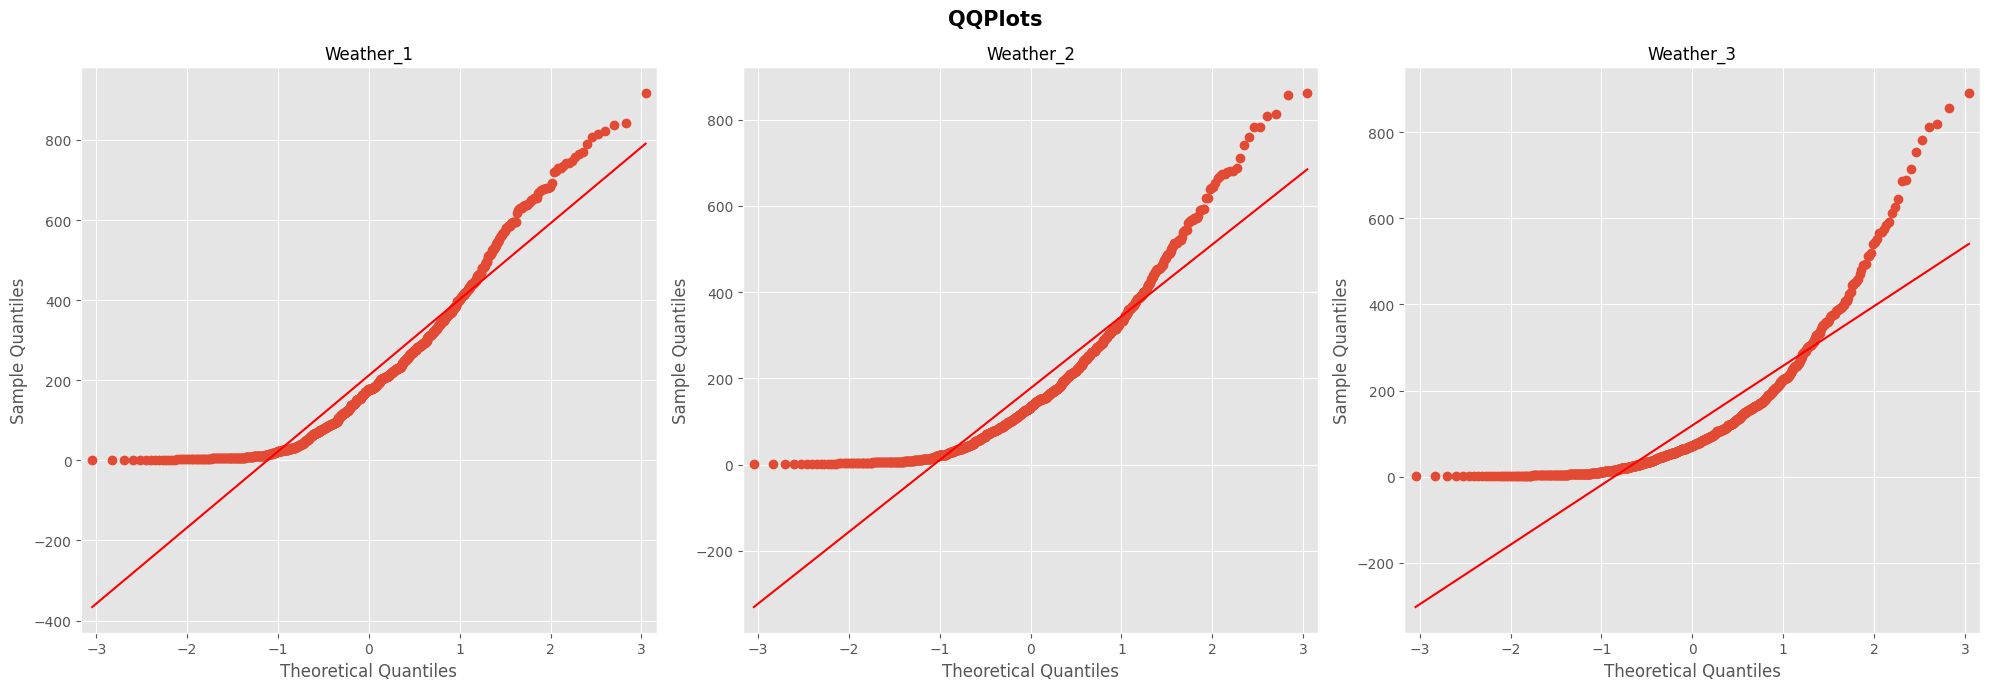

In [57]:
# Plotting qqplots for the weather samples.

with plt.style.context('ggplot'):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))
  qqplot(weather_1, line = 's', ax = ax1)
  ax1.set_title('Weather_1', size = 12)
  qqplot(weather_2, line = 's', ax = ax2)
  ax2.set_title('Weather_2', size = 12)
  qqplot(weather_3, line = 's', ax = ax3)
  ax3.set_title('Weather_3', size = 12)
  plt.suptitle("QQPlots", weight = 'bold', size = 15)
  plt.tight_layout()
  plt.show()

Again, the weather samples do not show normality.

Let us check for it statistically using the Shapiro-Wilk's test for normality.

In [58]:
# Shapiro-Wilk's Test for normality

# Ho : The data follows a gaussian distribution
# Ha : The data does not follow a gaussian distribution
weathers = (weather_1, weather_2, weather_3)
for num, weather in enumerate(weathers, start=1):
    test_stat, p_val = shapiro(weather)
    print(f"Weather_{num}:")
    print(f"Test statistic = {test_stat:.3f}, p-value = {p_val}")
    print()

Weather_1:
Test statistic = 0.898, p-value = 1.8881279695937856e-23

Weather_2:
Test statistic = 0.871, p-value = 5.433347349163901e-26

Weather_3:
Test statistic = 0.767, p-value = 3.875893017396149e-33



Since the p-values for all the weather samples are almost infinitesimal, we can therefore conclude that all the weather subsets are not of the Gaussian distribution.

- The test assumption of normality for Anova has failed and thus technically we should not be going forward with ANOVA test, but then ANOVA is considered to be robust to violations of normality with a possibility of a very small increase in the Type-1 error.

**_Test for equal variance_**

Another assumption of ANOVA is that:

There should be equal variance in different groups/categories in our data.



In [59]:
# Performing Levene's test for identifying equal variances amongst the weather groups.

# Ho = The weather groups have equal variances.
# Ha = The weather groups have different variances.
test_stat, p_val = levene(weather_1, weather_2, weather_3)
print(f"Levene's Test:\nTest statistic = {test_stat:.3f}, p-value = {p_val}")

Levene's Test:
Test statistic = 48.571, p-value = 1.969136048004419e-21


From the levene's test we can conclude that the variances between the groups are not equal which also violates the test assumptions for ANOVA.

Hence, we cannot continue further with the ANOVA test.

We shall use the `Kruskal-Walllis Test` to determine our results.
  - The Kruskal-Wallis test is a statistical test used to compare the medians of two or more independent groups.
  - It is an alternative to the one-way ANOVA, making it useful when data is not normally distributed.

In [60]:
# Kruskal-Wallis's test

Ho = "There is no statistically significant difference in the medians of the weather groups being compared."
Ha = "There is a statistically significant difference in the medians of at least two weather groups."

test_stat, p_val = kruskal(weather_1, weather_2, weather_3)
print(f"Kruskal-Wallis's Test:\nTest statistic = {test_stat:.3f}, p-value = {p_val}")

Kruskal-Wallis's Test:
Test statistic = 137.305, p-value = 1.5294778949096766e-30


**Test Result**

In [61]:
print(f"Reject Ho, \"{Ha}\"") if p_val <= alpha else f"Fail to reject Ho, \"{Ho}\""

Reject Ho, "There is a statistically significant difference in the medians of at least two weather groups."


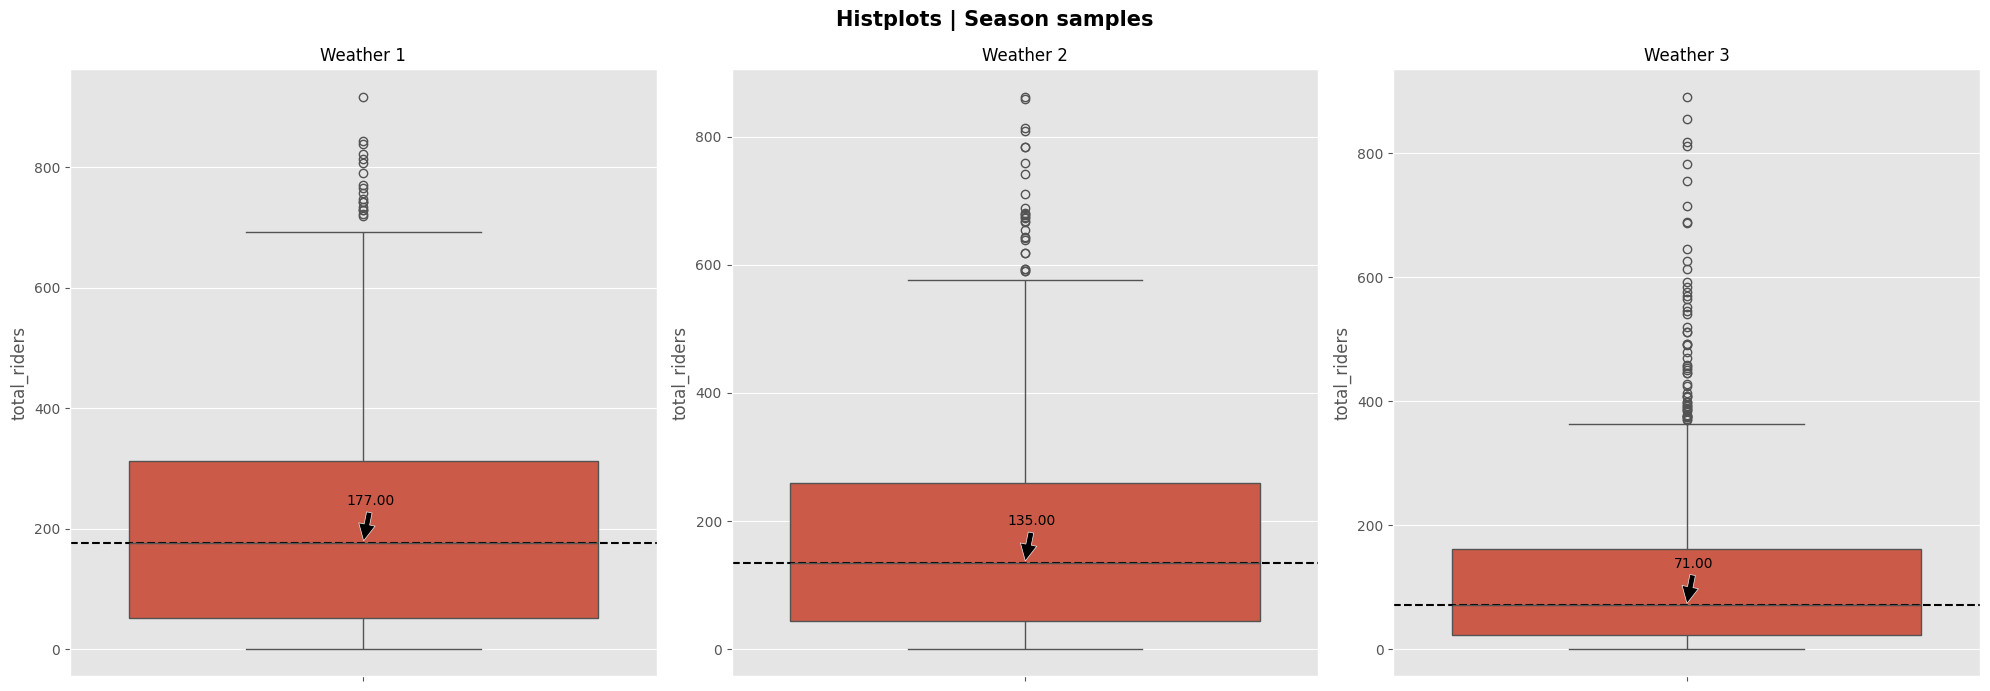

In [62]:
# Let's begin by plotting histplots of the season samples.
with plt.style.context('ggplot'):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))

  sns.boxplot(data=weather_1, ax=ax1)
  median_1 = weather_1.quantile(0.5)
  ax1.set_title('Weather 1', size = 12)
  ax1.axhline(y = median_1, linestyle = '--', color = 'k')
  ax1.annotate(f'{median_1:.2f}',
                 xy=(0, median_1), xycoords='data',
                 xytext=(5, 30), textcoords='offset points',
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 ha='center', va='center', fontsize=10, color='k')

  sns.boxplot(data=weather_2, ax=ax2)
  median_2 = weather_2.quantile(0.5)
  ax2.set_title('Weather 2', size = 12)
  ax2.axhline(y = weather_2.quantile(0.5), linestyle = '--', color = 'k')
  ax2.annotate(f'{median_2:.2f}',
                 xy=(0, median_2), xycoords='data',
                 xytext=(5, 30), textcoords='offset points',
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 ha='center', va='center', fontsize=10, color='k')

  sns.boxplot(data=weather_3, ax=ax3)
  median_3 = weather_3.quantile(0.5)
  ax3.set_title('Weather 3', size = 12)
  ax3.axhline(y = weather_3.quantile(0.5), linestyle = '--', color = 'k')
  ax3.annotate(f'{median_3:.2f}',
                 xy=(0, median_3), xycoords='data',
                 xytext=(5, 30), textcoords='offset points',
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 ha='center', va='center', fontsize=10, color='k')

  plt.suptitle('Histplots | Season samples', weight = 'bold', size = 15)
  plt.tight_layout()
  plt.show()

**Result : _The median hourly count of riders is significantly different for at least one of the weather groups._**

<div style="page-break-after: always;"></div>

### **Seasons | Mean hourly count of electric cycles rented**

In [63]:
# Creating samples for the different season groups from the dataset
season_1 = df[df['season']==1][tgt_var]
season_2 = df[df['season']==2][tgt_var]
season_3 = df[df['season']==3][tgt_var]
season_4 = df[df['season']==4][tgt_var]

**Formulation of the Null & Alternate Hypothesis**


The Null & Alternate hypothesis for our experiment can be framed as below.

In [64]:
Ho = "There is no significant difference in the means of hourly rider counts for all the season groups."
Ha = "The mean hourly count of riders is significantly different for at least one of the season groups."

**Test Selection**
- Given the categorical-numerical nature of the analysis of our Random variables with more than 2 unique categories, we can use the `one-way ANOVA test` to test our established hypotheses.

In [65]:
df.groupby('season')[tgt_var].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2685.0,116.325512,125.293931,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


From the above statistical description of the 'count' column grouped by 'season', it is eminent that the sample sizes for all our 3 categories are different and hence we need to create samples of equal sizes.

In [66]:
season_2 = season_2.sample(len(season_1))
season_3 = season_3.sample(len(season_1))
season_4 = season_4.sample(len(season_1))

**Significance Level**

- Considering our test, we can set significance level to be 5%.

In [67]:
alpha = 0.05

**Test Assumptions**

**_Test for Normality_**

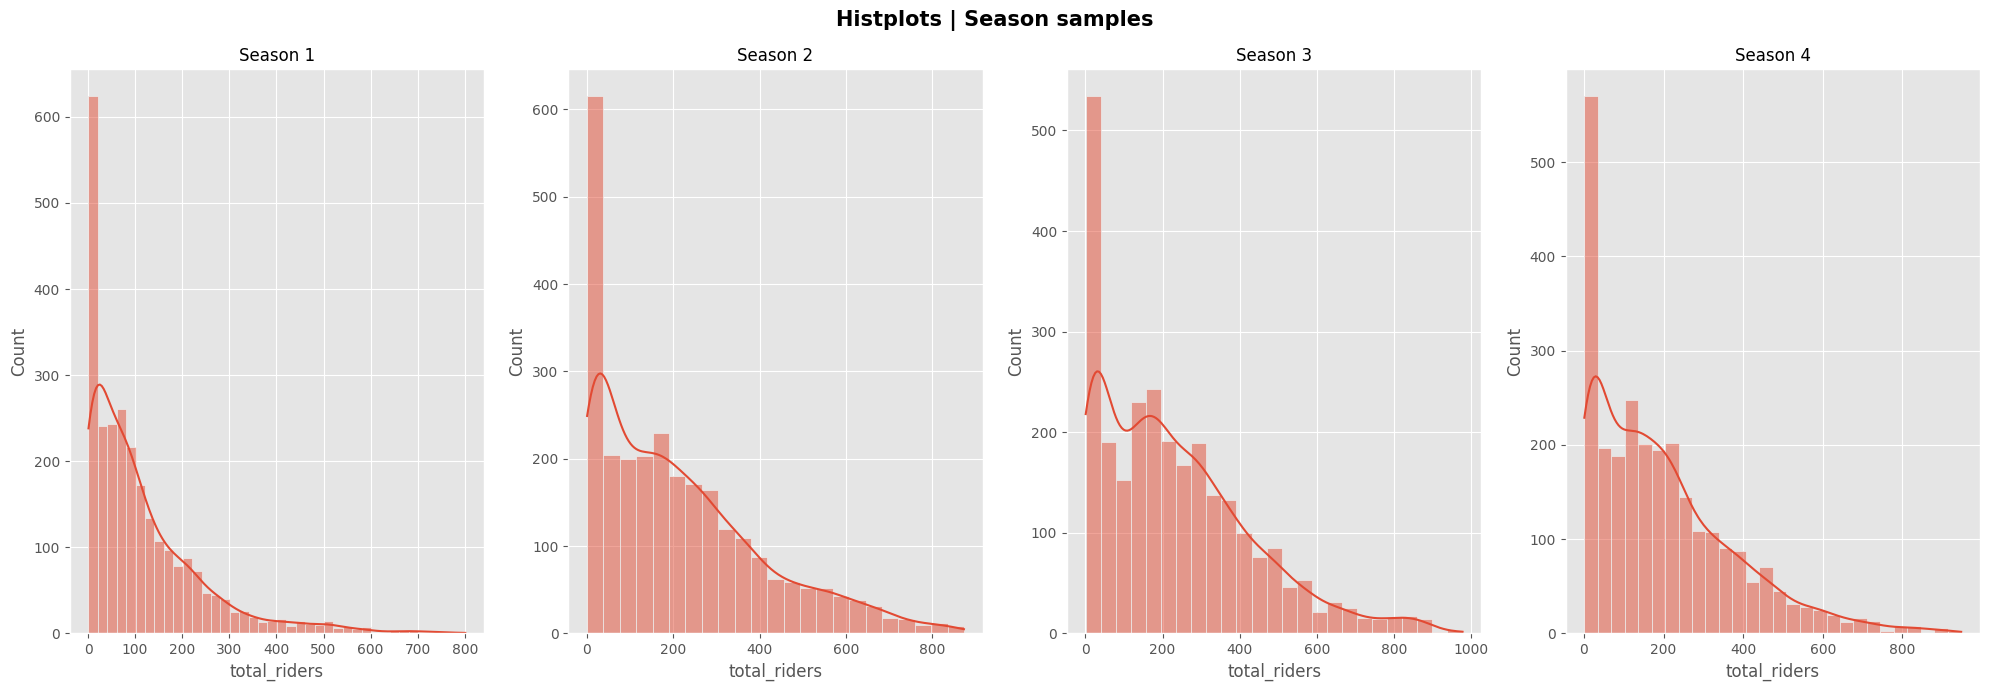

In [68]:
# Let's begin by plotting histplots of the season samples.
with plt.style.context('ggplot'):
  fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 7))

  sns.histplot(data=season_1, ax=ax1, kde = True)
  ax1.set_title('Season 1', size = 12)

  sns.histplot(data=season_2, ax=ax2, kde = True)
  ax2.set_title('Season 2', size = 12)

  sns.histplot(data=season_3, ax=ax3, kde = True)
  ax3.set_title('Season 3', size = 12)

  sns.histplot(data=season_4, ax=ax4, kde = True)
  ax4.set_title('Season 4', size = 12)

  plt.suptitle('Histplots | Season samples', weight = 'bold', size = 15)
  plt.tight_layout()
  plt.show()

From the looks of the histplots, the data does not seem to be of the Gaussian kind.

Let's plot qqplots to further check the normality.

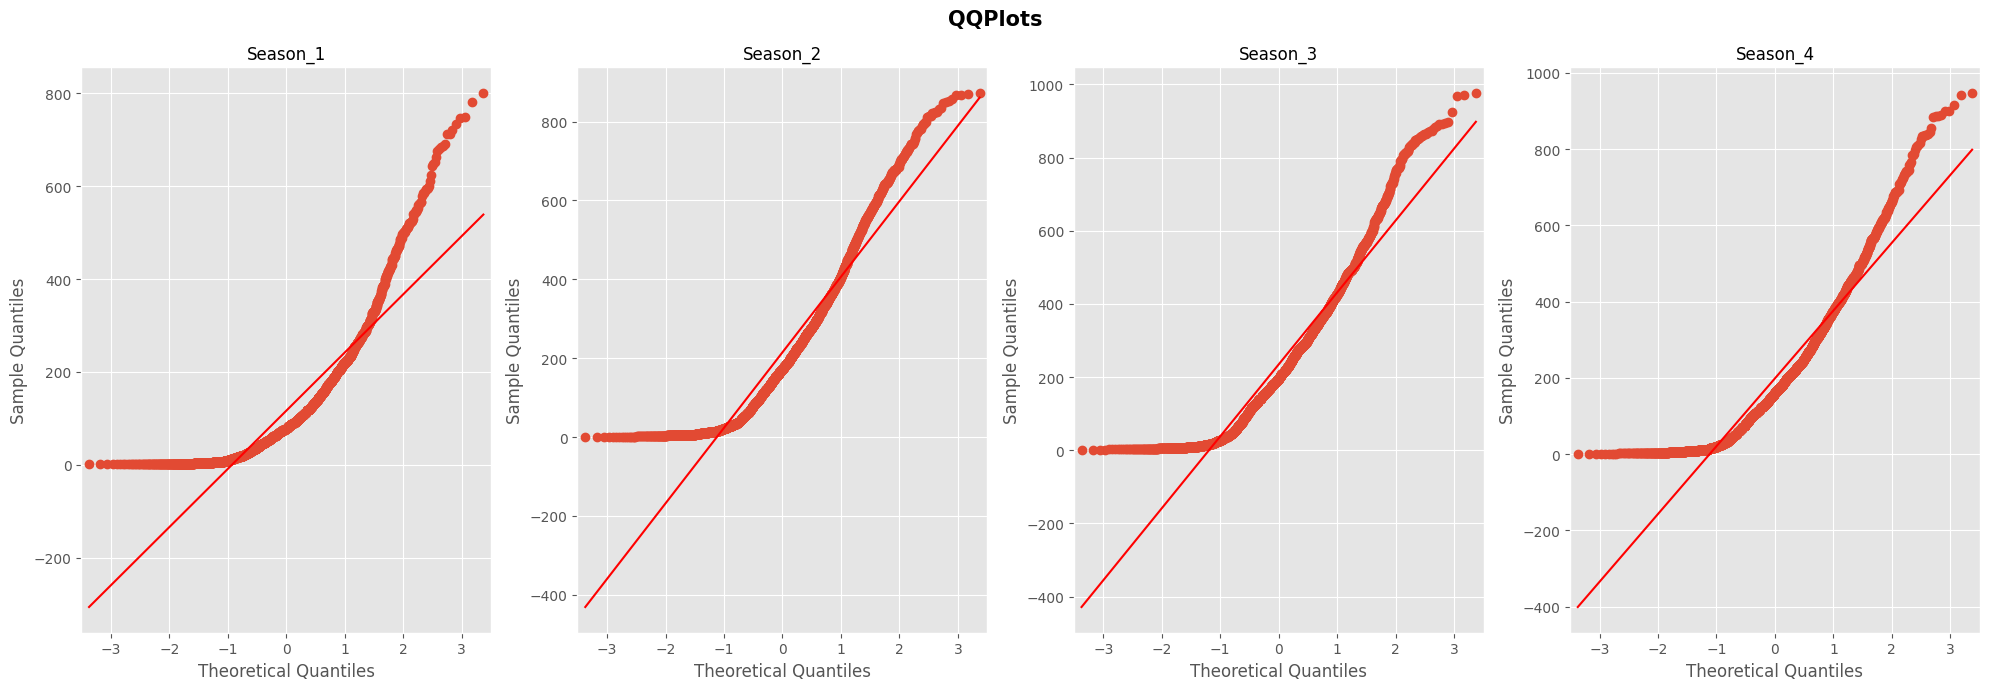

In [69]:
# Plotting qqplots for the season samples.

with plt.style.context('ggplot'):
  fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 7))

  qqplot(season_1, line = 's', ax = ax1)
  ax1.set_title('Season_1', size = 12)

  qqplot(season_2, line = 's', ax = ax2)
  ax2.set_title('Season_2', size = 12)

  qqplot(season_3, line = 's', ax = ax3)
  ax3.set_title('Season_3', size = 12)

  qqplot(season_4, line = 's', ax = ax4)
  ax4.set_title('Season_4', size = 12)

  plt.suptitle("QQPlots", weight = 'bold', size = 15)
  plt.tight_layout()
  plt.show()

Again, the season's samples do not show normality.

Let us check for it statistically using the Shapiro-Wilk's test for normality.

In [70]:
# Shapiro-Wilk's Test for normality

# Ho : The data follows a gaussian distribution
# Ha : The data does not follow a gaussian distribution
seasons = (season_1, season_2, season_3, season_4)
for num, season in enumerate(seasons, start=1):
    test_stat, p_val = shapiro(season)
    print(f"Season_{num}:")
    print(f"Test statistic = {test_stat:.3f}, p-value = {p_val}")
    print()

Season_1:
Test statistic = 0.809, p-value = 8.694772351355394e-49

Season_2:
Test statistic = 0.900, p-value = 1.143834456472573e-38

Season_3:
Test statistic = 0.915, p-value = 2.1505827224019452e-36

Season_4:
Test statistic = 0.895, p-value = 1.630072487265816e-39



Since the p-values for all the season samples are almost infinitesimal, we can therefore conclude that all the season subsets are not of the Gaussian distribution.

- The test assumption of normality for Anova has failed and thus technically we should not be going forward with ANOVA test, but then ANOVA is considered to be robust to violations of normality with a possibility of a very small increase in the Type-1 error.

**_Test for equal variance_**

Another assumption of ANOVA is that:

There should be equal variance in different groups/categories in our data.



In [71]:
# Performing Levene's test for identifying equal variances amongst the season groups.

# Ho = The season groups have equal variances.
# Ha = The season groups have different variances.
test_stat, p_val = levene(season_1, season_2, season_3, season_4)
print(f"Levene's Test:\nTest statistic = {test_stat:.3f}, p-value = {p_val}")

Levene's Test:
Test statistic = 184.286, p-value = 1.585726235737816e-116


From the levene's test we can conclude that the variances between the groups are not equal which also violates the test assumptions for ANOVA.

Hence, we cannot continue further with the ANOVA test.

We shall use the `Kruskal-Walllis Test` to determine our results.
  - The Kruskal-Wallis test is a statistical test used to compare the medians of two or more independent groups.
  - It is an alternative to the one-way ANOVA, making it useful when data is not normally distributed.

In [72]:
# Kruskal-Wallis's test

Ho = "There is no statistically significant difference in the medians of the season groups being compared."
Ha = "There is a statistically significant difference in the medians of at least two season groups."

test_stat, p_val = kruskal(season_1, season_2, season_3, season_4)
print(f"Kruskal-Wallis's Test:\nTest statistic = {test_stat:.3f}, p-value = {p_val}")

Kruskal-Wallis's Test:
Test statistic = 700.016, p-value = 2.0827758350404705e-151


**Test Result**

In [73]:
print(f"Reject Ho, \"{Ha}\"") if p_val <= alpha else f"Fail to reject Ho, \"{Ho}\""

Reject Ho, "There is a statistically significant difference in the medians of at least two season groups."


**Result : _The median hourly count of riders is significantly different for at least one of the season groups._**

<div style="page-break-after: always;"></div>

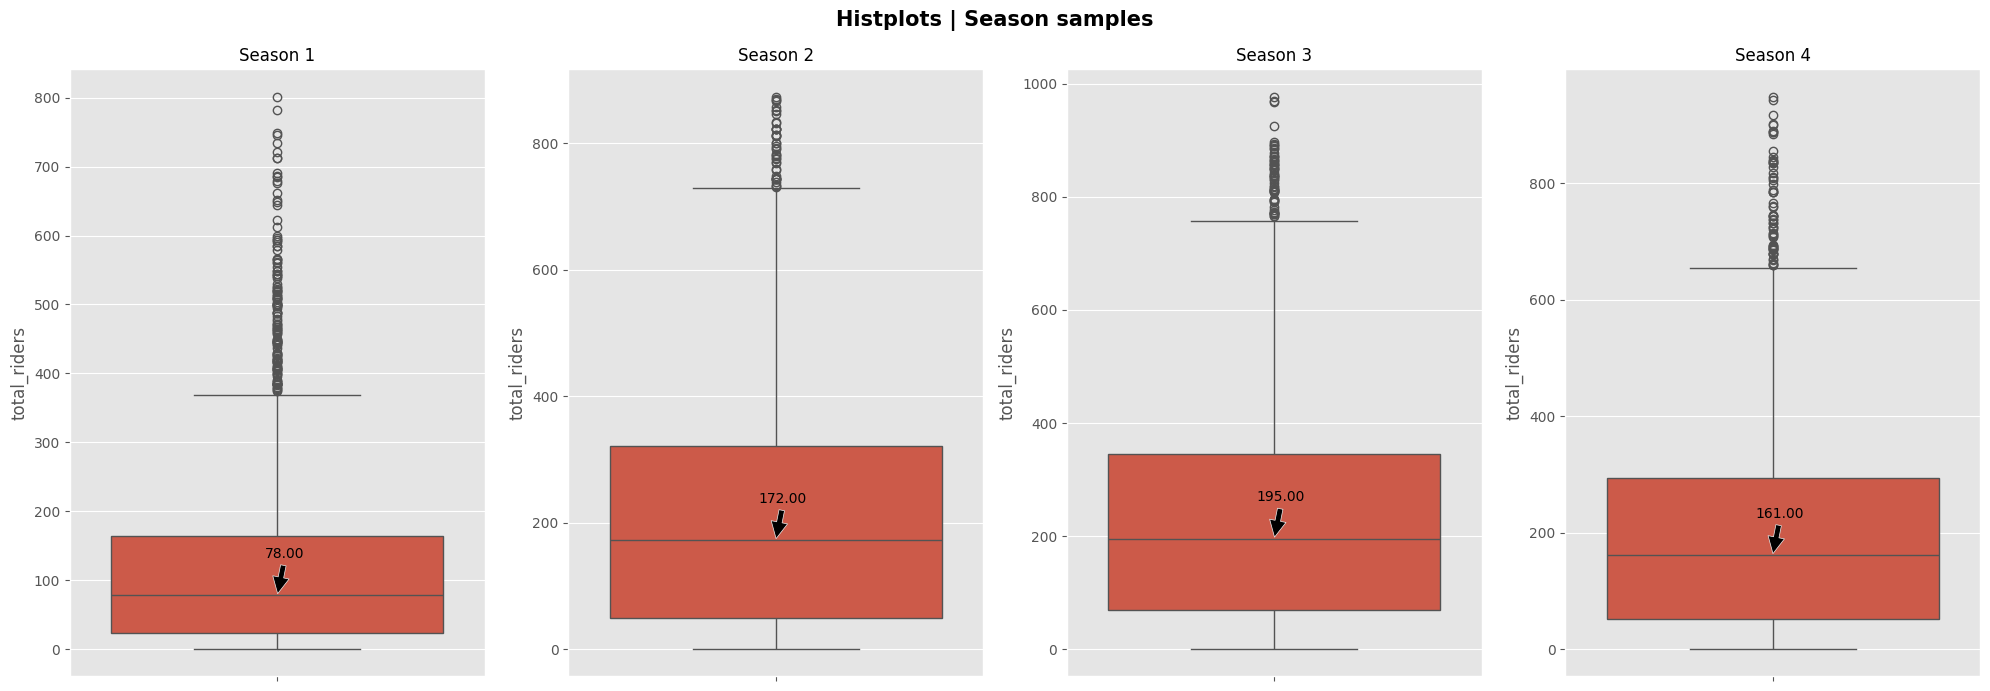

In [74]:
# Let's begin by plotting histplots of the season samples.
with plt.style.context('ggplot'):
  fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 7))

  sns.boxplot(data=season_1, ax=ax1)
  median_1 = season_1.quantile(0.5)
  ax1.set_title('Season 1', size = 12)
  ax1.annotate(f'{median_1:.2f}',
                 xy=(0, median_1), xycoords='data',
                 xytext=(5, 30), textcoords='offset points',
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 ha='center', va='center', fontsize=10, color='k')

  sns.boxplot(data=season_2, ax=ax2)
  median_2 = season_2.quantile(0.5)
  ax2.set_title('Season 2', size = 12)
  ax2.annotate(f'{median_2:.2f}',
                 xy=(0, median_2), xycoords='data',
                 xytext=(5, 30), textcoords='offset points',
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 ha='center', va='center', fontsize=10, color='k')

  sns.boxplot(data=season_3, ax=ax3)
  median_3 = season_3.quantile(0.5)
  ax3.set_title('Season 3', size = 12)
  ax3.annotate(f'{median_3:.2f}',
                 xy=(0, median_3), xycoords='data',
                 xytext=(5, 30), textcoords='offset points',
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 ha='center', va='center', fontsize=10, color='k')

  sns.boxplot(data=season_4, ax=ax4)
  median_4 = season_4.quantile(0.5)
  ax4.set_title('Season 4', size = 12)
  ax4.annotate(f'{median_4:.2f}',
                 xy=(0, median_4), xycoords='data',
                 xytext=(5, 30), textcoords='offset points',
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 ha='center', va='center', fontsize=10, color='k')

  plt.suptitle('Histplots | Season samples', weight = 'bold', size = 15)
  plt.tight_layout()
  plt.show()

<div style="page-break-after: always;"></div>

### **Dependency between weather conditions and different seasons**

**Formulation of the Null & Alternate Hypothesis**


The Null & Alternate hypothesis for our experiment can be framed as below.

In [75]:
Ho = "There is no significant association between the Weather & Season variables."
Ha = "There is a significant association between the Weather & Season variables."

**Test Selection**

- Given the Categorical-Categorical nature of the analysis of our random variables, a `Chi-squared test for Independence` is the way to go for the hypothesis tests.

**Data preparation**

In [76]:
# Creating a contingency table using pd.crosstab to be used later
contingency_table = pd.crosstab(index=df["season"], columns= df["weather"]).fillna(0)
contingency_table

weather,1,2,3
season,,,
1,1759,715,211
2,1801,708,224
3,1930,604,199
4,1702,807,225


**Significance Level**

- Considering our test, we can set significance level to be 5%.

In [77]:
alpha = 0.05

**Calculating the test Statistics / p-value**

In [78]:
chi_stat, p_val, dof, exp_arr = chi2_contingency(contingency_table)
print(f"Test statistic : {round(chi_stat, 5)}\np-value : {p_val}")

Test statistic : 46.10146
p-value : 2.8260014509929343e-08


**Test Result**

In [79]:
print(f"Reject Ho, \"{Ha}\"") if p_val <= alpha else f"Fail to reject Ho, \"{Ho}\""

Reject Ho, "There is a significant association between the Weather & Season variables."


**Result :** **_There is a significant statistical association between the Weather & Season variables in our dataset._**

<div style="page-break-after: always;"></div>

## **Insights**

- Seasonality has a significant impact on ridership. Fall (season 3) shows the highest number of riders, while Spring (season 1) shows the least.
- Weather conditions strongly influence rider behavior. Clear weather (condition 1) results in the highest ridership, while severe weather (condition 4) sees the lowest usage.
- Temperature has a substantial effect on ridership, with peak customer numbers occurring between 20-25°C (68-77°F).
- Apparent temperature (feels-like temperature) shows a similar pattern, with peak ridership around 25-30°C (77-86°F).
- Humidity levels impact ridership, with moderate humidity (50-70%) seeing the highest customer numbers.
- Wind speed affects usage, with customer counts highest at low to moderate wind speeds (0-15 mph) and sharply declining as wind speed increases.
- There's a strong correlation between temperature and apparent temperature (0.985), suggesting only one of these variables may be necessary for predictive modeling.
- Registered users make up a significant majority of riders, indicating a strong base of regular customers.
- Working days do not significantly impact the mean hourly number of riders, suggesting consistent usage patterns throughout the week.
- Casual ridership drops significantly during winter and spring, indicating weather sensitivity among non-regular users.
- There's a statistically significant association between weather conditions and seasons, which could be useful for demand forecasting.
- The total number of riders is very strongly correlated with the number of registered riders (0.971), suggesting that focusing on increasing registered users could be a key growth strategy.

## **Recommendations**

- Implement a dynamic pricing model based on weather conditions and seasons to optimize revenue and encourage ridership during off-peak times.
- Develop targeted marketing campaigns for each season, focusing on the unique benefits of using the service in different weather conditions.
- Introduce weather-specific promotions to encourage ridership during less favorable conditions, such as discounts on rainy days.
- Invest in weather protection accessories for bikes (e.g., canopies, windscreens) to make riding more comfortable in various conditions.
- Launch a loyalty program to convert more casual riders into registered users, as they form the backbone of consistent ridership.
- Optimize bike placement based on historical weather and usage data to ensure availability in high-demand areas.
- Partner with local businesses and tourist attractions to promote the service, especially during peak seasons and favorable weather conditions.
- Develop a robust maintenance schedule that accounts for seasonal variations in usage to ensure optimal bike availability and performance.
- Introduce features in the mobile app that provide real-time weather updates and suggest optimal routes based on current conditions.
- Collaborate with city planners to improve cycling infrastructure, focusing on areas that see high ridership during favorable conditions.
- Implement a data-driven inventory management system to adjust the number of available bikes based on predicted demand, considering both weather and seasonal factors.
- Create educational content for users about safe riding practices in various weather conditions to encourage year-round usage.